In [1]:
import numpy as np
import pandas as pd
import pickle
import os 


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso



path_data = "/nmnt/x01-hdd/HCP/data/"

with open(path_data + "not_normed_connectomes", 'rb') as f:
    Y = pickle.load(f)
    

with open(path_data + "new_roi_thick", 'rb') as f:
    roi_think = pickle.load(f)

with open(path_data + "new_roi_area", 'rb') as f:
    roi_area = pickle.load(f)
    

with open(path_data + "new_roi_vol", 'rb') as f:
    roi_vol = pickle.load(f)
    


In [46]:
norm_area = np.array([roi_area[:,i]/np.sum(roi_area, axis = -1) for i in range(68)]).T
norm_vol = np.array([roi_vol[:,i]/np.sum(roi_vol, axis = -1) for i in range(68)]).T

In [53]:
data = pd.DataFrame(data = np.concatenate((roi_think, norm_area, norm_vol,), axis = -1), 
                    columns=['thick']*68 + ['area']*68 + ['vol']*68)
data.head()

thick     thick     thick     thick     thick     thick     thick  \
0  2.749852  2.632673  2.757285  2.170696  3.287128  2.935042  2.565191   
1  2.732503  3.286786  2.818191  2.020464  3.213618  2.999317  2.638277   
2  2.557480  2.522862  2.584928  2.094318  3.385193  2.822187  2.493901   
3  2.691796  2.888141  2.711976  2.215577  3.641071  2.894603  2.553396   
4  2.640387  2.420201  2.849077  1.997910  3.293150  2.844963  2.467969   

      thick     thick     thick    ...          vol       vol       vol  \
0  3.005195  2.183266  2.314532    ...     0.004391  0.046898  0.058286   
1  2.963619  2.433753  2.266801    ...     0.003869  0.036598  0.054498   
2  2.815713  2.119738  2.218340    ...     0.004848  0.039267  0.044223   
3  3.041467  2.458132  2.240381    ...     0.004446  0.041132  0.044304   
4  2.824770  2.121836  2.268124    ...     0.005235  0.031105  0.043541   

        vol       vol       vol       vol       vol       vol       vol  
0  0.025368  0.018697  0.019601  0.001576  0.005744  0.001580  0.011365  
1  0.024180  0.021903  0.022854  0.001395  0.002991  0.001640  0.010275  
2  0.029312  0.022449  0.022903  0.001795  0.003896  0.001069  0.011041  
3  0.025947  0.022799  0.017404  0.001842  0.005276  0.002613  0.012287  
4  0.029404  0.029416  0.019377  0.002535  0.005097  0.001753  0.013654  

[5 rows x 204 columns]

thick     thick     thick     thick     thick     thick     thick  \
0    2.749852  2.632673  2.757285  2.170696  3.287128  2.935042  2.565191   
1    2.732503  3.286786  2.818191  2.020464  3.213618  2.999317  2.638277   
2    2.557480  2.522862  2.584928  2.094318  3.385193  2.822187  2.493901   
3    2.691796  2.888141  2.711976  2.215577  3.641071  2.894603  2.553396   
4    2.640387  2.420201  2.849077  1.997910  3.293150  2.844963  2.467969   
5    2.888219  2.605850  2.863428  2.335012  3.563622  3.109503  2.717353   
6    2.522110  2.438790  2.729122  2.150658  3.277901  2.790587  2.526183   
7    2.648463  2.551879  2.902063  2.137215  3.596566  2.926073  2.549255   
8    2.688486  2.839674  2.724243  2.039267  3.217067  2.983179  2.626873   
9    2.846398  2.709330  2.712737  2.217502  3.322146  3.040550  2.656308   
10   2.553887  2.494483  2.641161  2.110749  3.193367  2.860291  2.595547   
11   2.714192  2.568046  2.705666  2.069175  3.213251  2.932094  2.597528   
12   2.658924  2.551636  2.815159  2.115091  3.369994  2.868042  2.611771   
13   2.811911  3.143522  2.831419  2.088150  3.098736  2.911585  2.694214   
14   2.809762  2.934721  3.029685  2.165923  3.887956  3.092454  2.820040   
15   2.718658  2.386679  2.544361  1.938466  3.225578  2.806396  2.551544   
16   2.613753  2.382391  2.839778  1.951528  3.177810  2.817752  2.502704   
17   2.747823  2.409750  2.641943  2.059664  3.291986  2.909820  2.651314   
18   2.761268  2.637232  2.719956  2.253179  3.470498  2.750421  2.617393   
19   2.854500  2.784306  2.837439  2.180686  3.438099  2.951927  2.536297   
20   2.839428  2.624442  2.651668  2.125137  3.329095  2.843284  2.449873   
21   2.657813  2.703158  2.833848  2.045069  3.223541  2.895418  2.535039   
22   2.724814  2.435126  2.615242  1.969586  3.378597  2.760800  2.434239   
23   2.636828  2.797763  2.583586  1.888732  2.977820  2.827512  2.484192   
24   2.738591  2.874615  2.761270  2.154912  3.462304  2.787987  2.568172   
25   2.538406  2.476513  2.577491  1.883262  3.035008  2.744373  2.472868   
26   2.717946  3.112281  2.761436  2.015280  3.158265  2.991471  2.618221   
27   2.658836  2.349074  2.779593  1.986967  3.513283  2.899465  2.547170   
28   2.866025  2.751597  2.842718  2.292094  3.425575  3.121696  2.712327   
29   2.443080  2.683122  2.600842  1.931582  3.392503  2.715431  2.447237   
..        ...       ...       ...       ...       ...       ...       ...   
759  2.683751  2.845670  2.781080  2.263205  3.631396  2.956240  2.713660   
760  2.834608  2.603139  2.758732  2.374544  2.901966  2.847032  2.695362   
761  2.651206  2.207929  2.660767  1.982221  3.156572  3.037363  2.659125   
762  2.873070  2.615537  2.910113  2.138798  3.351424  2.927968  2.712837   
763  2.778343  2.600714  2.584477  2.129961  3.313761  2.907299  2.607116   
764  2.874895  2.309693  2.962648  2.044923  3.634475  2.962046  2.658144   
765  2.880794  2.580517  2.748964  2.227634  3.620872  3.060817  2.694823   
766  2.694434  2.474809  2.844455  2.169115  3.516228  2.958321  2.672819   
767  2.650263  2.847559  2.433210  2.095966  3.613523  2.754536  2.392765   
768  2.360786  2.409664  2.538603  1.877838  3.238955  2.762729  2.329047   
769  2.968621  2.569787  2.893650  2.065738  3.427667  2.955865  2.604056   
770  2.735118  2.383091  2.824595  2.025940  3.693463  2.952445  2.581860   
771  2.680666  2.635295  2.732398  2.137251  3.375297  2.947690  2.474293   
772  2.825411  2.535034  2.626014  2.036332  3.439415  2.844209  2.471608   
773  2.824702  2.613079  2.785386  2.057885  3.301556  2.903312  2.590176   
774  2.561280  2.761926  2.611288  1.932425  3.106868  2.727269  2.436224   
775  2.539642  2.617351  2.735009  1.881556  3.025650  2.769620  2.539257   
776  2.844151  2.635904  2.846923  2.238618  3.540789  3.172945  2.660819   
777  2.788527  2.585054  2.732047  2.153589  2.980252  3.040664  2.540680   
778  2.779402  2.591344  2.659305  2.093340  3.329623  2.782619  2.641644   
779 

In [2]:
with open(path_data + "mean_mesh_labels", 'rb') as f:
    mean_mesh_labels = pickle.load(f)

with open(path_data + "subjects_log_jac", 'rb') as f:
    log_jac = pickle.load(f)

with open(path_data + "subjects_thinkness", 'rb') as f:
    thinkness = pickle.load(f)
    
with open(path_data + "subjects_mesh_area", 'rb') as f:
    mesh_area = pickle.load(f)


log_jac = log_jac.reshape(789, -1)
thinkness = thinkness.reshape(789, -1)
mesh_area = mesh_area.reshape(789, -1)
mean_mesh_labels = mean_mesh_labels.reshape(-1)

In [3]:
nodes = np.unique(mean_mesh_labels)
res = []
thick = thinkness
thick_mean = []
thick_median = []
thick_quant = []
uthick = []
for one in nodes:
    if one != 0:
        idx = np.where(mean_mesh_labels == one)[0]
        thick_mean  += [np.mean(thick[:,idx], axis = -1)]
        thick_median += [np.median(thick[:, idx], axis = -1)]
        thick_quant += [np.percentile(thick[:, idx], q = 75,axis = -1) - np.percentile(thick[:, idx], q = 25,axis = -1)]
        uthick += [np.sum(thick[:, idx], axis = -1)]

In [4]:
thick_mean = np.array(thick_mean).T
thick_median = np.array(thick_median).T
thick_quant = np.array(thick_quant).T
uthick = np.array(uthick).T

In [5]:
wdeg = Y.sum(axis = -1)

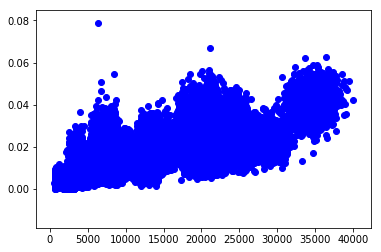

In [8]:
for i in range(789):
    plt.scatter(uthick[i,:], wdeg[i,:]/np.sum(wdeg[i,:]),c = 'b')
plt.savefig('thick_sum_to_norm_wdeg')

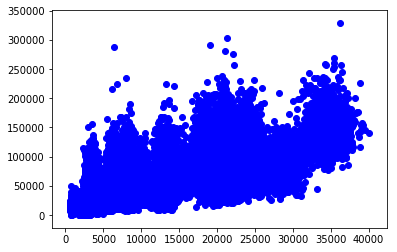

In [9]:
for i in range(789):
    plt.scatter(uthick[i,:], wdeg[i,:],c = 'b')
plt.savefig('thick_sum_to_wdeg')

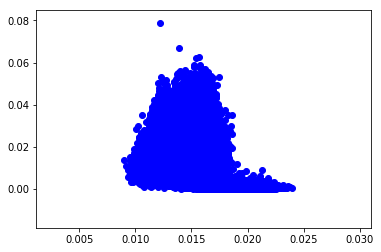

In [11]:
for i in range(789):
    plt.scatter(thick_mean[i,:]/np.sum(thick_mean[i,:]), wdeg[i,:]/np.sum(wdeg[i,:]),c = 'b')
plt.savefig('norm_thick_mean_to_norm_wdeg')

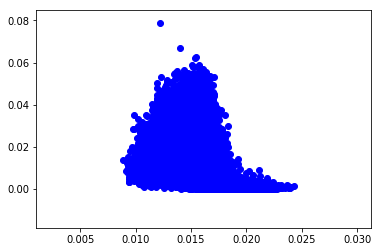

In [12]:
for i in range(789):
    plt.scatter(thick_median[i,:]/np.sum(thick_median[i,:]), wdeg[i,:]/np.sum(wdeg[i,:]),c = 'b')
plt.savefig('norm_thick_median_to_norm_wdeg')

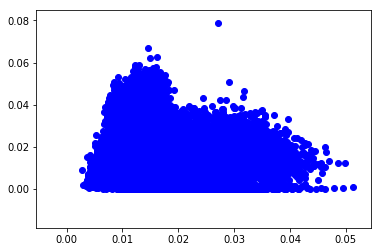

In [13]:
for i in range(789):
    plt.scatter(thick_quant[i,:]/np.sum(thick_quant[i,:]), wdeg[i,:]/np.sum(wdeg[i,:]),c = 'b')
plt.savefig('norm_thick_quantilies_to_norm_wdeg')

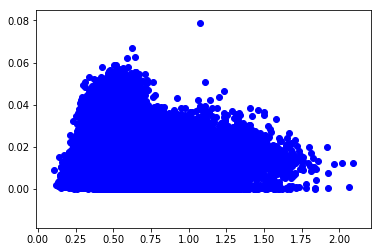

In [14]:
for i in range(789):
    plt.scatter(thick_quant[i,:], wdeg[i,:]/np.sum(wdeg[i,:]),c = 'b')
plt.savefig('thick_quantilies_to_norm_wdeg')

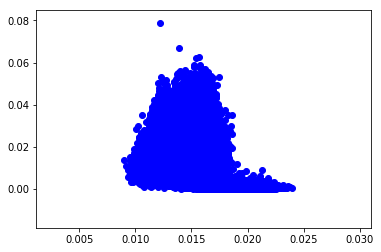

In [15]:
for i in range(789):
    plt.scatter(roi_think[i,:]/np.sum(roi_think[i,:]), wdeg[i,:]/np.sum(wdeg[i,:]),c = 'b')
plt.savefig('norm_roi_thick_to_norm_wdeg')

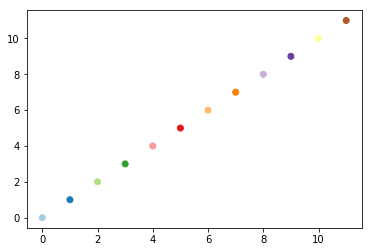

In [21]:
meta['Gender'] = meta['Gender'].astype('category')
meta['Age'] = meta['Age'].astype('category')
meta['Age'] = meta['Age'].cat.codes
meta["Gender"] = meta['Gender'].cat.codes

meta[15:20]

legend_gender = {'F':0, 'M':1}
legend_age = {'22-25':0, '26-30':1,'31-35':2, '36+':3}

color_gender = np.array(meta.Gender)
color_age = np.array(meta.Age)


%matplotlib inline

from matplotlib import cm
cmap = plt.get_cmap('Paired')
plt.scatter(range(12), range(12), c = cmap.colors)

cmap_gender = dict(zip(color_gender, [cmap.colors[1], cmap.colors[5]]))
cmap_gender

cmap_age = {0: cmap.colors[1],
            1: cmap.colors[5],
            2: cmap.colors[3], 
            3: cmap.colors[9]}

c_age = [cmap_age[i] for i in color_age]
c_gender = [cmap_gender[i] for i in color_gender]

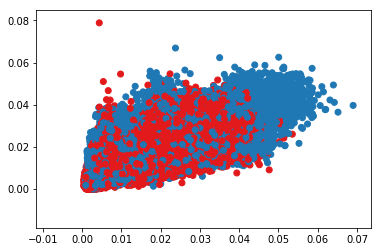

In [18]:
for i in range(789):
    plt.scatter(roi_area[i,:]/np.sum(roi_area[i,:]), wdeg[i,:]/np.sum(wdeg[i,:]),c = c_gender)
plt.savefig('norm_roi_area_to_norm_wdeg_gender')

In [19]:
np.corrcoef(roi_area[i,:]/np.sum(roi_area[i,:]), wdeg[i,:]/np.sum(wdeg[i,:]))

array([[ 1.        ,  0.71631553],
       [ 0.71631553,  1.        ]])

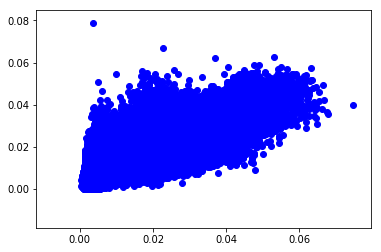

In [20]:
for i in range(789):
    plt.scatter(roi_vol[i,:]/np.sum(roi_vol[i,:]), wdeg[i,:]/np.sum(wdeg[i,:]),c = 'b')
plt.savefig('norm_roi_vol_to_norm_wdeg_gender')

In [7]:
new_thick = np.array([thick_mean[:,i]/np.sum(thick_mean, axis = -1) for i in range(68)]).T

In [11]:
wdeg_norm = np.array([wdeg[:,i]/np.sum(wdeg, axis = -1) for i in range(68)]).T

In [13]:
wdeg.shape, 

((789, 68),)

(0.013, 0.017)

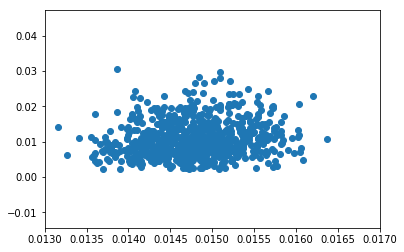

In [59]:
plt.scatter(new_thick[:,0], wdeg_norm[:,0])
plt.xlim((0.013,0.017))


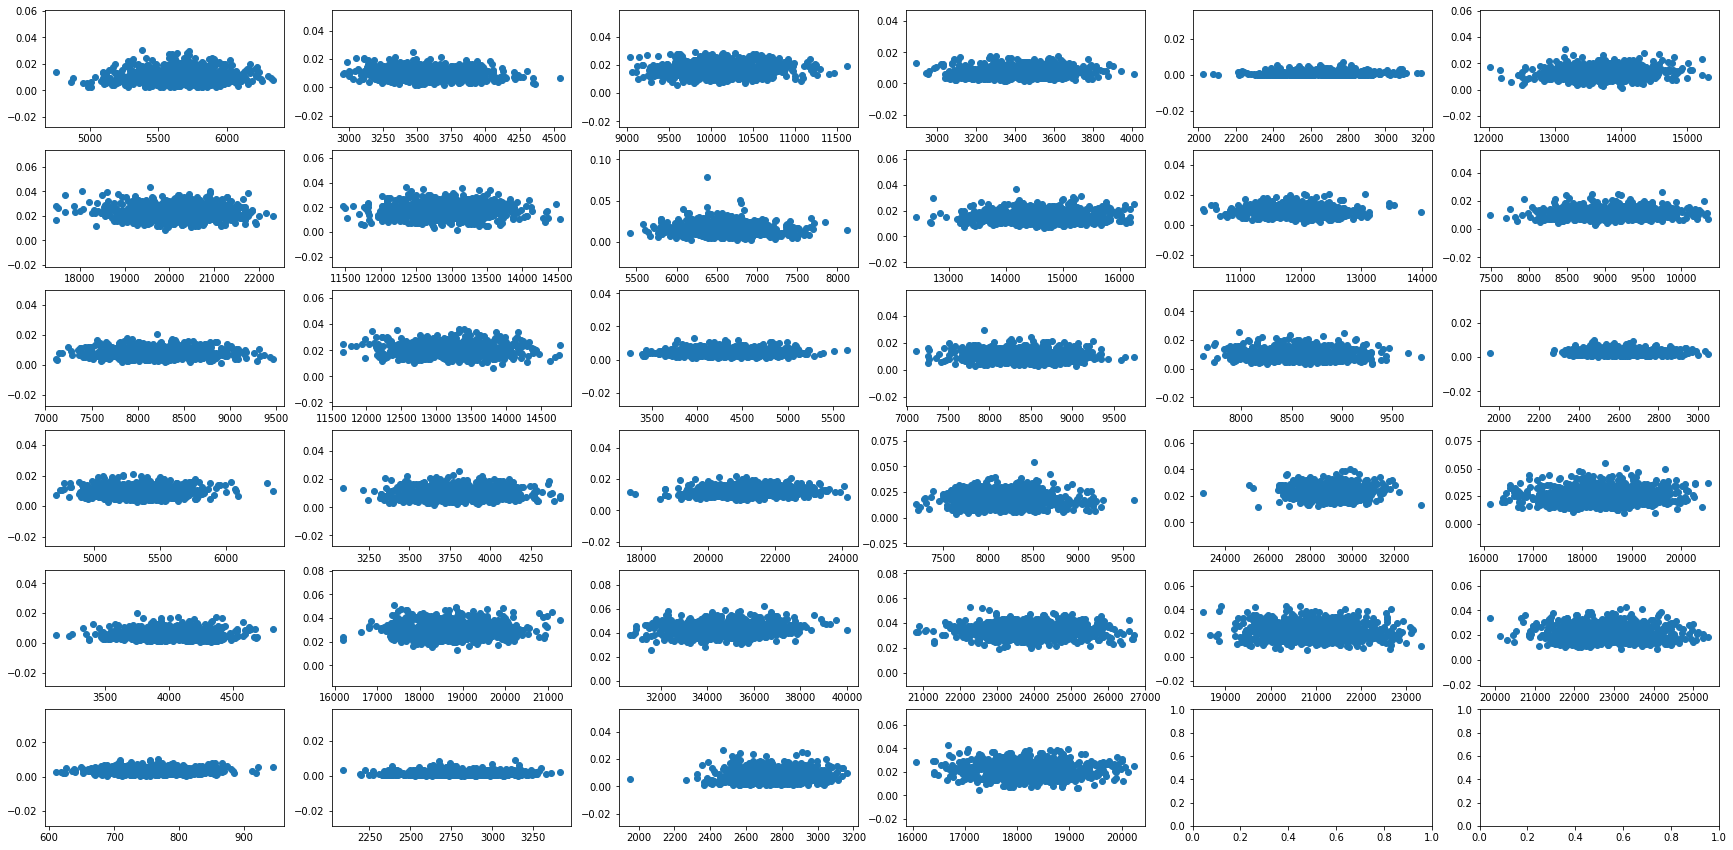

In [15]:
idx = np.arange(36).reshape(6,6)
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break
        ax[i, j].scatter(uthick[:, idx[i,j]], wdeg_norm[:,idx[i,j]])
        

In [16]:
from scipy.stats import spearmanr

In [17]:
corr = np.array([spearmanr(uthick[:,i], wdeg_norm[:,i]) for i in range(68)])

In [18]:
corr

array([[  9.01843824e-02,   1.12655573e-02],
       [ -1.55047887e-01,   1.21577784e-05],
       [  4.81848461e-02,   1.76339916e-01],
       [  1.14758412e-01,   1.24211577e-03],
       [  8.70947331e-02,   1.43975149e-02],
       [  9.55272437e-02,   7.24935331e-03],
       [ -4.51568737e-02,   2.05136233e-01],
       [  4.24005801e-02,   2.34186830e-01],
       [ -7.32159658e-02,   3.97754546e-02],
       [  3.08910013e-02,   3.86197996e-01],
       [ -4.84317025e-02,   1.74132076e-01],
       [  9.96506778e-02,   5.08434719e-03],
       [ -5.67609540e-03,   8.73522991e-01],
       [ -3.94009239e-02,   2.68980756e-01],
       [  5.34294682e-02,   1.33749216e-01],
       [ -2.05931907e-02,   5.63541463e-01],
       [ -3.48147564e-02,   3.28736340e-01],
       [ -2.15718573e-02,   5.45149273e-01],
       [  1.00001246e-02,   7.79127212e-01],
       [  5.76584465e-02,   1.05586080e-01],
       [  6.63446426e-02,   6.25098112e-02],
       [ -5.95794012e-02,   9.44519992e-02],
       [ -

In [66]:
y = corr[:,0]
y.shape

(68,)

In [69]:
bet, clos, eig, clust

(789,)

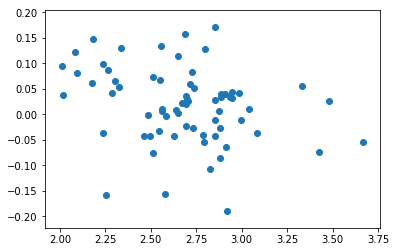

In [70]:
plt.scatter(np.mean(thick_mean, axis = 0), y)

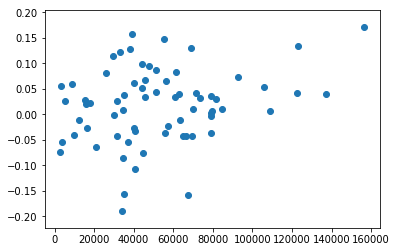

In [71]:
plt.scatter(np.mean(wdeg,axis = 0), y)

In [19]:
path_data = '/nmnt/x01-hdd/HCP/data/'


targets_name = ['clustering', 'rich_club', 'betweenness', 'closeness',  'degree_centrality', 'eigenvector']

targets_data = []
for name in targets_name:
    with open(path_data + name, 'rb') as f:
        targets_data  += [pickle.load(f)]

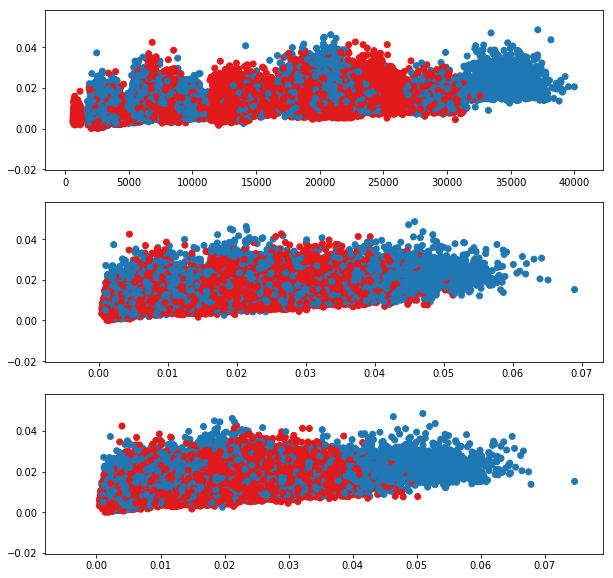

In [22]:
fig, ax = plt.subplots(3,1, figsize = (10,10))
for i in range(789):
    ax[0].scatter(uthick[i,:], targets_data[0][i,:],c = c_gender)

for i in range(789):
    ax[1].scatter(roi_area[i,:]/np.sum(roi_area[i,:]), targets_data[0][i,:],c = c_gender)  
for i in range(789):
    ax[2].scatter(roi_vol[i,:]/np.sum(roi_vol[i,:]), targets_data[0][i,:],c = c_gender)

plt.savefig('norm_roi_thick_area_vol_to_norm_clustering_gender')


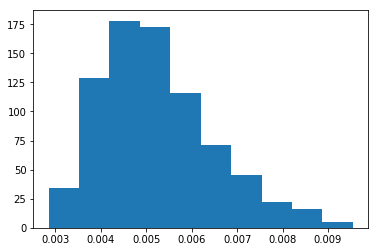

In [108]:
plt.hist(np.std(clust, axis = -1));

In [25]:
a = [spearmanr(uthick.reshape(-1), targets_data[i].reshape(-1)) for i in [0,2,3,5]]
a

[SpearmanrResult(correlation=0.65760375240368463, pvalue=0.0),
 SpearmanrResult(correlation=-0.33877014666604055, pvalue=0.0),
 SpearmanrResult(correlation=-0.17357692148956083, pvalue=0.0),
 SpearmanrResult(correlation=0.65304070045984941, pvalue=0.0)]

In [96]:
new_area = np.array([roi_area[:,i]/np.sum(roi_area, axis = -1) for i in range(68)]).T
b = [spearmanr(new_area.reshape(-1), targets_data[i].reshape(-1)) for i in [0,2,3,5]]
b

[SpearmanrResult(correlation=0.64195896644089911, pvalue=0.0),
 SpearmanrResult(correlation=-0.29992628897985346, pvalue=0.0),
 SpearmanrResult(correlation=-0.14012735482786612, pvalue=2.2902529660825743e-233),
 SpearmanrResult(correlation=0.62315454163139339, pvalue=0.0)]

In [97]:
new_vol = np.array([roi_vol[:,i]/np.sum(roi_vol, axis = -1) for i in range(68)]).T
c = [spearmanr(new_vol.reshape(-1), targets_data[i].reshape(-1)) for i in [0,2,3,5]]
c

[SpearmanrResult(correlation=-0.14757065674210437, pvalue=7.2856858174512742e-259),
 SpearmanrResult(correlation=0.11836306532435387, pvalue=1.2463536837913678e-166),
 SpearmanrResult(correlation=0.081968258383390113, pvalue=1.2149436692331748e-80),
 SpearmanrResult(correlation=-0.20105933228148787, pvalue=0.0)]

In [99]:
corr_wdeg = np.array([spearmanr(roi_think[i,:], wdeg[i,:]) for i in range(789)])
all_corr = np.array([[spearmanr(roi_think[j,:], targets_data[i][j,:]) for j in range(789)] for i in [0,2,3,5]])


In [100]:
corr_wdeg.shape, all_corr.shape

((789, 2), (4, 789, 2))

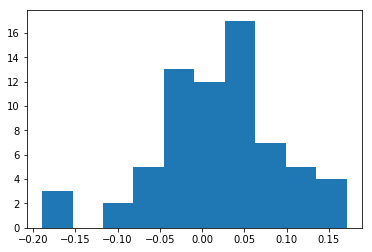

In [102]:
plt.hist(corr[:,0]);

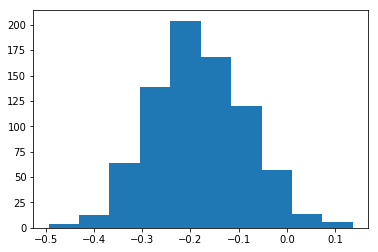

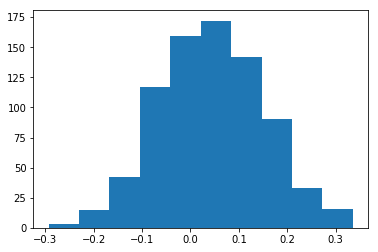

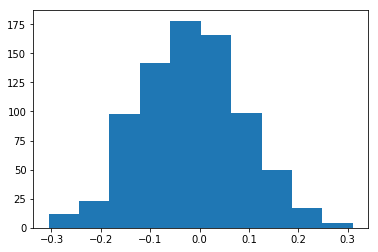

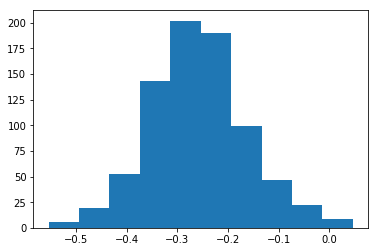

In [104]:
for i in range(4):
    plt.hist(all_corr[i][:,0])
    plt.figure();

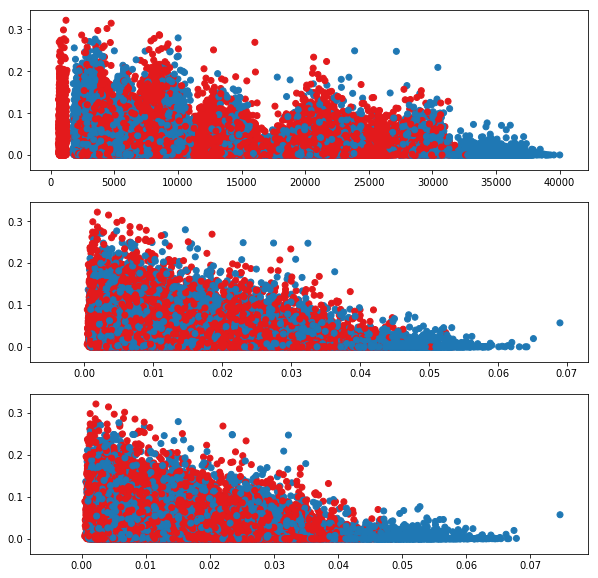

In [24]:
fig, ax = plt.subplots(3,1, figsize = (10,10))
for i in range(789):
    ax[0].scatter(uthick[i,:], targets_data[2][i,:],c = c_gender)
for i in range(789):
    ax[1].scatter(roi_area[i,:]/np.sum(roi_area[i,:]), targets_data[2][i,:],c = c_gender)
for i in range(789):
    ax[2].scatter(roi_vol[i,:]/np.sum(roi_vol[i,:]), targets_data[2][i,:],c = c_gender)
plt.savefig('norm_roi_thick_area_vol_to_norm_betweenness_gender')

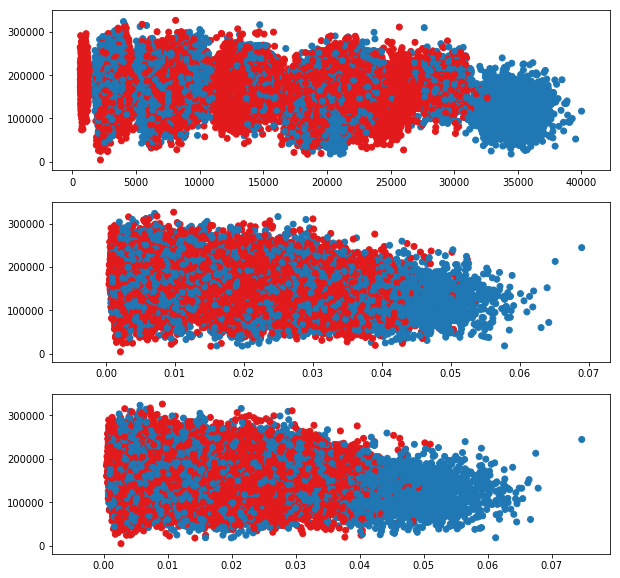

In [26]:
fig, ax = plt.subplots(3,1, figsize = (10,10))
for i in range(789):
    ax[0].scatter(uthick[i,:], targets_data[3][i,:],c = c_gender)
for i in range(789):
    ax[1].scatter(roi_area[i,:]/np.sum(roi_area[i,:]), targets_data[3][i,:],c = c_gender)
for i in range(789):
    ax[2].scatter(roi_vol[i,:]/np.sum(roi_vol[i,:]), targets_data[3][i,:],c = c_gender)
#plt.figure()
plt.savefig('norm_roi_thick_area_vol_to_norm_closeness_gender')

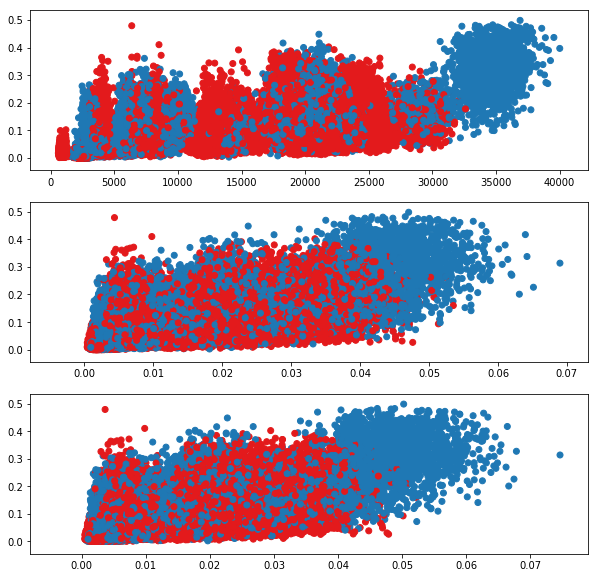

In [27]:
fig, ax = plt.subplots(3,1, figsize = (10,10))
for i in range(789):
    ax[0].scatter(uthick[i,:], targets_data[5][i,:],c = c_gender)
for i in range(789):
    ax[1].scatter(roi_area[i,:]/np.sum(roi_area[i,:]), targets_data[5][i,:],c = c_gender)
for i in range(789):
    ax[2].scatter(roi_vol[i,:]/np.sum(roi_vol[i,:]), targets_data[5][i,:],c = c_gender)
#plt.figure()
plt.savefig('norm_roi_thick_area_vol_to_norm_eigenval_gender')

In [33]:
def load_centers(path):
    centers = pd.DataFrame(columns = ['name', 'coordinate'])
    for name in os.listdir(path):
        
        vec = pd.read_csv(path+name)
        #print(vec.shape)
        vec.drop(vec.index[[3,38]], inplace = True)
        vec.__delitem__('Unnamed: 7')
        vec.__delitem__('region')
        vec.__delitem__('voxel_cordX')
        vec.__delitem__('voxel_cordY')
        vec.__delitem__('voxel_cordZ')
        mat = np.array(vec.as_matrix()).T
        #filename = filename[:12]
        
        single_subject = pd.DataFrame(data = [[name, mat]], 
                                      columns = ['name','coordinate'])

        centers = centers.append(single_subject)
    return centers

In [34]:
centers = load_centers(path_centers)

In [47]:
f_center = centers.coordinate.iloc[0]

In [49]:
f_center.shape

(3, 68)

In [51]:
from scipy.spatial.distance import squareform, pdist

In [52]:
dist = pdist(f_center.T)
dist.shape

(2278,)

In [81]:
mean_wconnec = squareform(Y.sum(axis = 0))
mean_bconnec = Y.copy()
mean_bconnec[Y > 0] = 1
mean_bconnec = squareform(mean_bconnec.sum(axis = 0)/len(Y))
idx_b = np.where(mean_bconnec != 0)[0]
idx_w = np.where(mean_wconnec != 0)[0]
mean_wconnec.shape, mean_bconnec.shape, idx_b.shape, idx_w.shape

((2278,), (2278,), (2051,), (2051,))

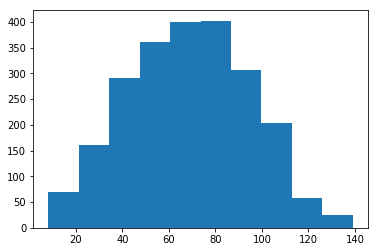

In [75]:
plt.hist(dist);

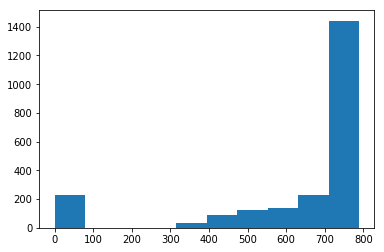

In [76]:
plt.hist(mean_bconnec);

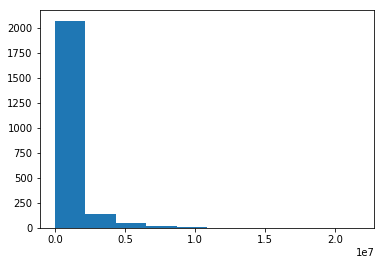

In [77]:
plt.hist(mean_wconnec);

In [86]:
min(mean_wconnec[idx_w]), max(mean_wconnec[idx_w])

(1474.0, 21713754.0)

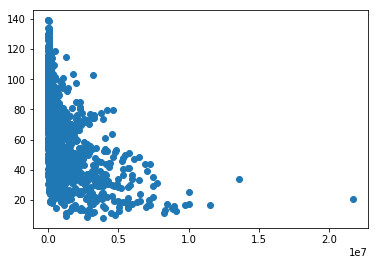

In [82]:
plt.scatter(mean_wconnec[idx_w], dist[idx_w]);

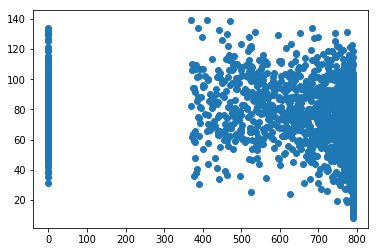

In [87]:
plt.scatter(mean_bconnec, dist);

In [89]:
a = set(subj_idx)
b = set(meta.Subject.astype(str))
c = a.difference(b)
np.where(subj_idx == c.pop())[0]

subj_idx_un = np.array(np.arange(151).tolist() + np.arange(152, 789).tolist())
subj_idx_un.shape

(788,)

In [90]:
sc = StandardScaler()

st_think = sc.fit_transform(roi_think)
mean_think = np.round(sc.mean_,2)
std_think = np.round(sc.var_,2)

st_area = sc.fit_transform(roi_area)
mean_area = np.round(sc.mean_,2)
std_area = np.round(sc.var_,2)

st_vol = sc.fit_transform(roi_vol)
mean_vol = np.round(sc.mean_,2)
std_vol = np.round(sc.var_,2)

In [91]:
wdeg = Y.sum(axis = -1)
norm_wdeg = norm_Y.sum(axis = -1)

In [92]:
max_wdeg = max(wdeg.reshape(-1))
min_wdeg = min(wdeg.reshape(-1))

max_norm_wdeg = max(norm_wdeg.reshape(-1))
min_norm_wdeg = min(norm_wdeg.reshape(-1))

max_st_think = max(st_think.reshape(-1))
min_st_think = min(st_think.reshape(-1))


max_st_area = max(st_area.reshape(-1))
min_st_area = min(st_area.reshape(-1))


max_st_vol = max(st_vol.reshape(-1))
min_st_vol = min(st_vol.reshape(-1))

# THINKNESS

In [14]:
meta[15:20]

Subject Gender    Age
27   104416      F  31-35
28   104820      F    36+
29   105014      F  26-30
30   105115      M  31-35
31   105216      M  26-30

In [15]:
meta['Gender'] = meta['Gender'].astype('category')
meta['Age'] = meta['Age'].astype('category')
meta['Age'] = meta['Age'].cat.codes
meta["Gender"] = meta['Gender'].cat.codes

meta[15:20]

legend_gender = {'F':0, 'M':1}
legend_age = {'22-25':0, '26-30':1,'31-35':2, '36+':3}

color_gender = np.array(meta.Gender)
color_age = np.array(meta.Age)


%matplotlib inline

from matplotlib import cm
cmap = plt.get_cmap('Paired')
plt.scatter(range(12), range(12), c = cmap.colors)

cmap_gender = dict(zip(color_gender, [cmap.colors[1], cmap.colors[5]]))
cmap_gender

cmap_age = {0: cmap.colors[1],
            1: cmap.colors[5],
            2: cmap.colors[3], 
            3: cmap.colors[9]}

c_age = [cmap_age[i] for i in color_age]
c_gender = [cmap_gender[i] for i in color_gender]

In [103]:
idx = np.array([i for i in range(36)]).reshape(6,6)

In [104]:
roi_think.shape

(789, 68)

In [139]:
man_idx = np.where(np.array(meta.Gender) == 1)[0]
man = roi_think[np.ix_(man_idx)]
st_man_think = sc.fit_transform(man)
man_mean_think = np.round(sc.mean_,2)
man_var_think = np.round(sc.var_,2)

woman_idx = np.where(np.array(meta.Gender) == 0)[0]
woman = roi_think[np.ix_(woman_idx)]
st_woman_think = sc.fit_transform(woman)
woman_mean_think = np.round(sc.mean_,2)
woman_var_think = np.round(sc.var_,2)

In [140]:
age0_idx = np.where(np.array(meta.Age) == 0)[0]
age0 = roi_think[np.ix_(age0_idx)]
st_age0_think = sc.fit_transform(age0)
age0_mean_think = np.round(sc.mean_,2)
age0_var_think = np.round(sc.var_,2)

age1_idx = np.where(np.array(meta.Age) == 1)[0]
age1 = roi_think[np.ix_(age1_idx)]
st_age1_think = sc.fit_transform(age1)
age1_mean_think = np.round(sc.mean_,2)
age1_var_think = np.round(sc.var_,2)

age2_idx = np.where(np.array(meta.Age) == 2)[0]
age2 = roi_think[np.ix_(age2_idx)]
st_age2_think = sc.fit_transform(age2)
age2_mean_think = np.round(sc.mean_,2)
age2_var_think = np.round(sc.var_,2)

age3_idx = np.where(np.array(meta.Age) == 3)[0]
age3 = roi_think[np.ix_(age3_idx)]
st_age3_think = sc.fit_transform(age3)
age3_mean_think = np.round(sc.mean_,2)
age3_var_think = np.round(sc.var_,2)

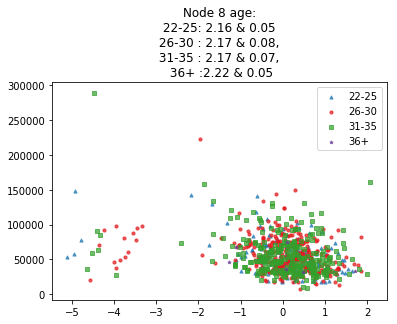

In [153]:
i = 1
j = 2
plt.scatter(st_age0_think[:, idx[i,j]], wdeg[age0_idx, idx[i,j]],
                         marker = '^', c = cmap_age[legend_age['22-25']], 
                        s = 10, alpha = 0.7, label = '22-25')

plt.scatter(st_age1_think[:, idx[i,j]], wdeg[age1_idx, idx[i,j]],
                marker = 'o', c = cmap_age[legend_age['26-30']],
                s = 10, alpha = 0.7, label = '26-30')

plt.scatter(st_age2_think[:, idx[i,j]], wdeg[age2_idx, idx[i,j]],
                marker = 's', c = cmap_age[legend_age['31-35']],
                s = 10, alpha = 0.7, label = '31-35')

plt.scatter(st_age3_think[:, idx[i,j]], wdeg[age3_idx, idx[i,j]],
                marker = '*', c = cmap_age[legend_age['36+']],
                s = 10, alpha = 0.7, label = '36+')
plt.legend()
plt.title("Node {0:.0f} age:\n 22-25: {1:.2f} & {2:.2f} \n 26-30 \
: {3:.2f} & {4:.2f}, \n 31-35 : {5:.2f} & {6:.2f}, \n 36+ :{7:.2f} & {8:.2f}".format(idx[i,j], 
                                age0_mean_think[idx[i,j]], age0_var_think[idx[i,j]],
                                age1_mean_think[idx[i,j]], age1_var_think[idx[i,j]],
                                age2_mean_think[idx[i,j]], age2_var_think[idx[i,j]],
                                age3_mean_think[idx[i,j]], age3_var_think[idx[i,j]]))
plt.savefig('ages_roi_to_thick_8')

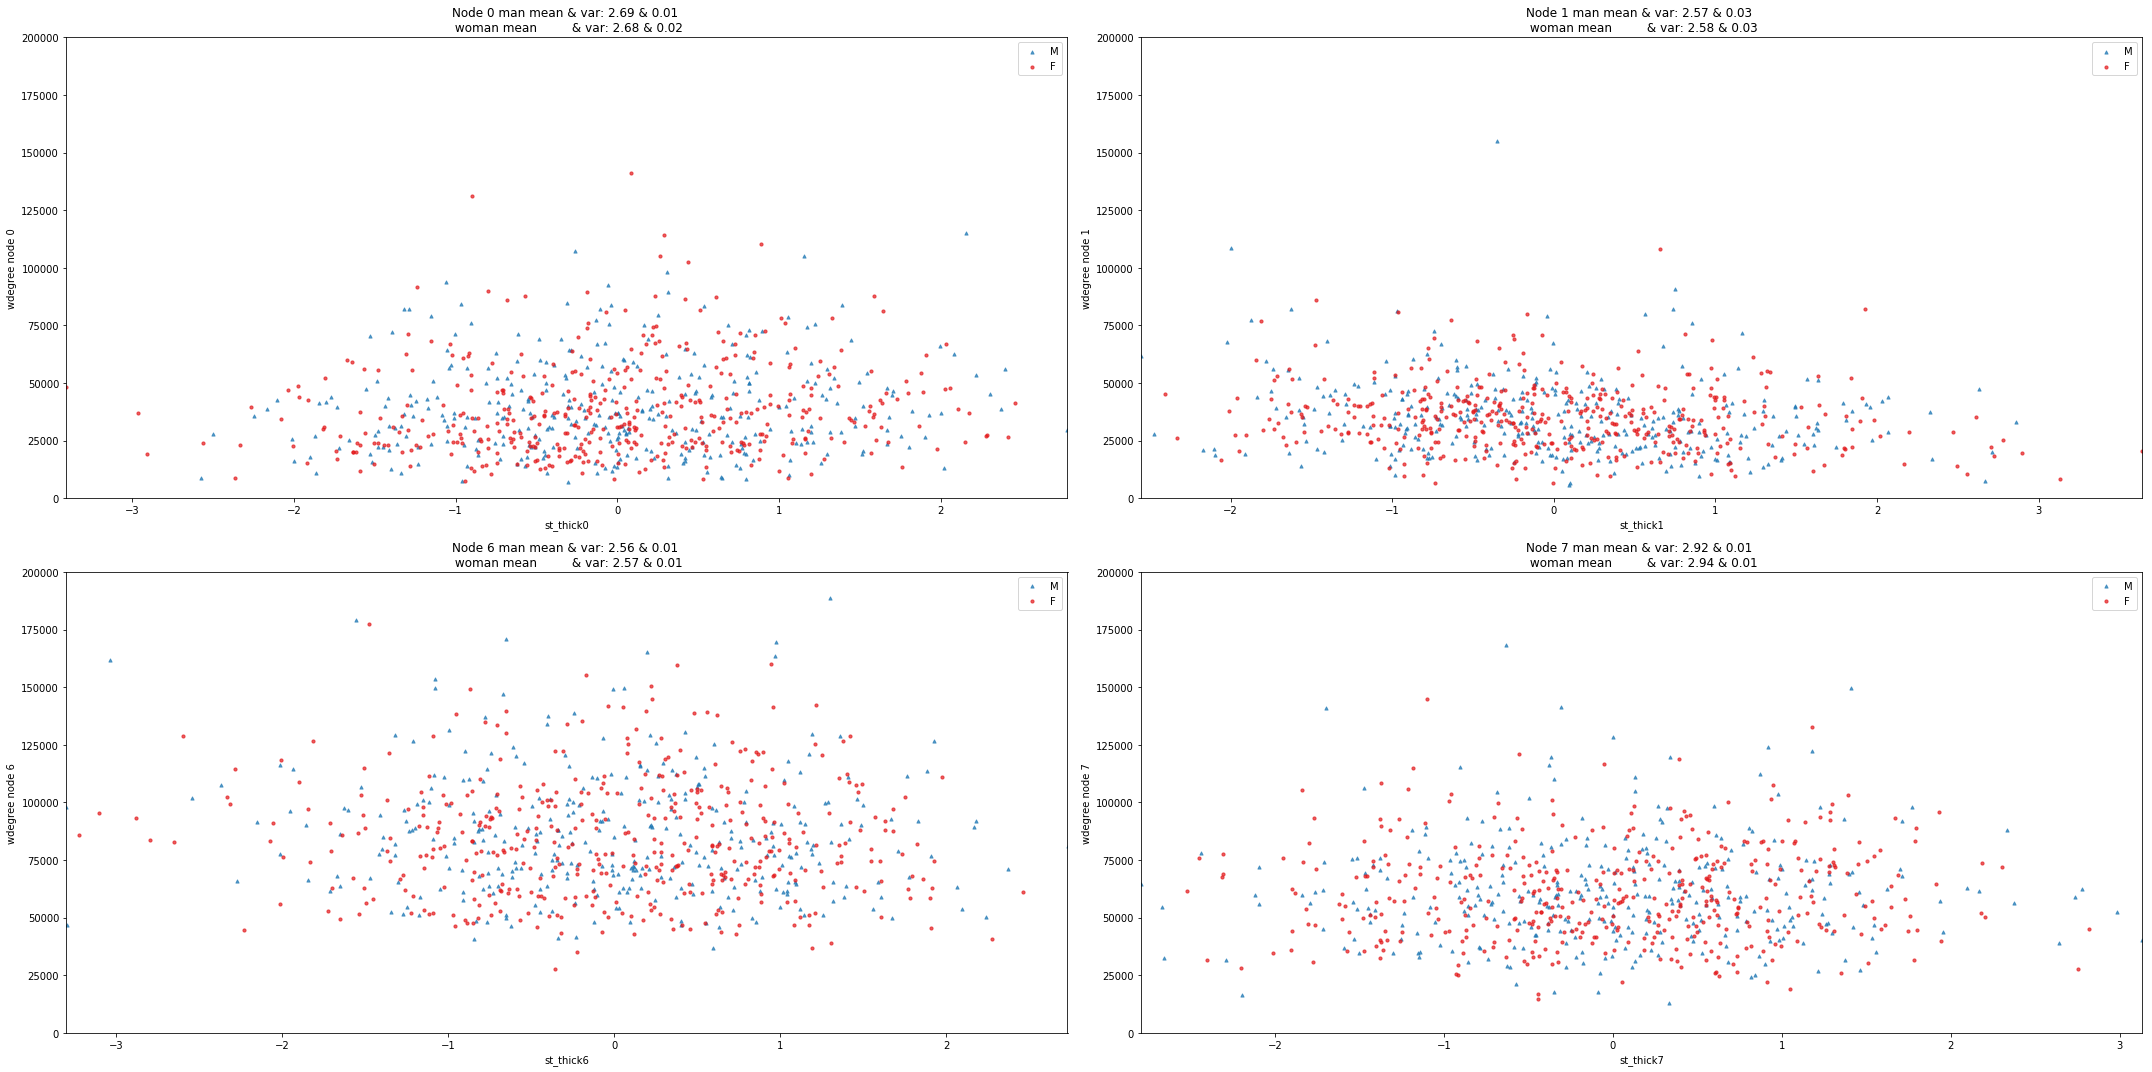

In [141]:
fig, ax = plt.subplots(2,2, figsize = (30,15))
for i in range(0,2):
    for j in range(0,2):
        if i == 5:
            if j == 4:
                break
        ax[i, j].scatter(st_man_think[:, idx[i,j]], wdeg[man_idx, idx[i,j]],
                         marker = '^', c = cmap_gender[legend_gender['M']], 
                        s = 10, alpha = 0.7, label = 'M')
        
        ax[i, j].scatter(st_woman_think[:, idx[i,j]], wdeg[woman_idx, idx[i,j]],
                        marker = 'o', c = cmap_gender[legend_gender['F']],
                        s = 10, alpha = 0.7, label = 'F')
        ax[i, j].legend()
        ax[i, j].set_title("Node {0:.0f} man mean & var: {1:.2f} & {2:.2f} \n woman mean \
        & var: {3:.2f} & {4:.2f}".format(idx[i,j], man_mean_think[idx[i,j]],
                                         man_var_think[idx[i,j]],
                                         woman_mean_think[idx[i,j]], woman_var_think[idx[i,j]]))
        
        ax[i, j].set_xlabel('st_thick' + str(idx[i,j]))
        ax[i, j].set_ylabel('wdegree node ' + str(idx[i,j]))
        ax[i, j].set_xlim([min(min(st_man_think[:,idx[i,j]]), min(st_woman_think[:,idx[i,j]])),
                           max(max(st_man_think[:,idx[i,j]]), max(st_woman_think[:,idx[i,j]]))])
        ax[i, j].set_ylim([min_wdeg, 200000])
plt.tight_layout()
plt.savefig( 'woman_man_thinkness_to_wdeg', dpi = 200)

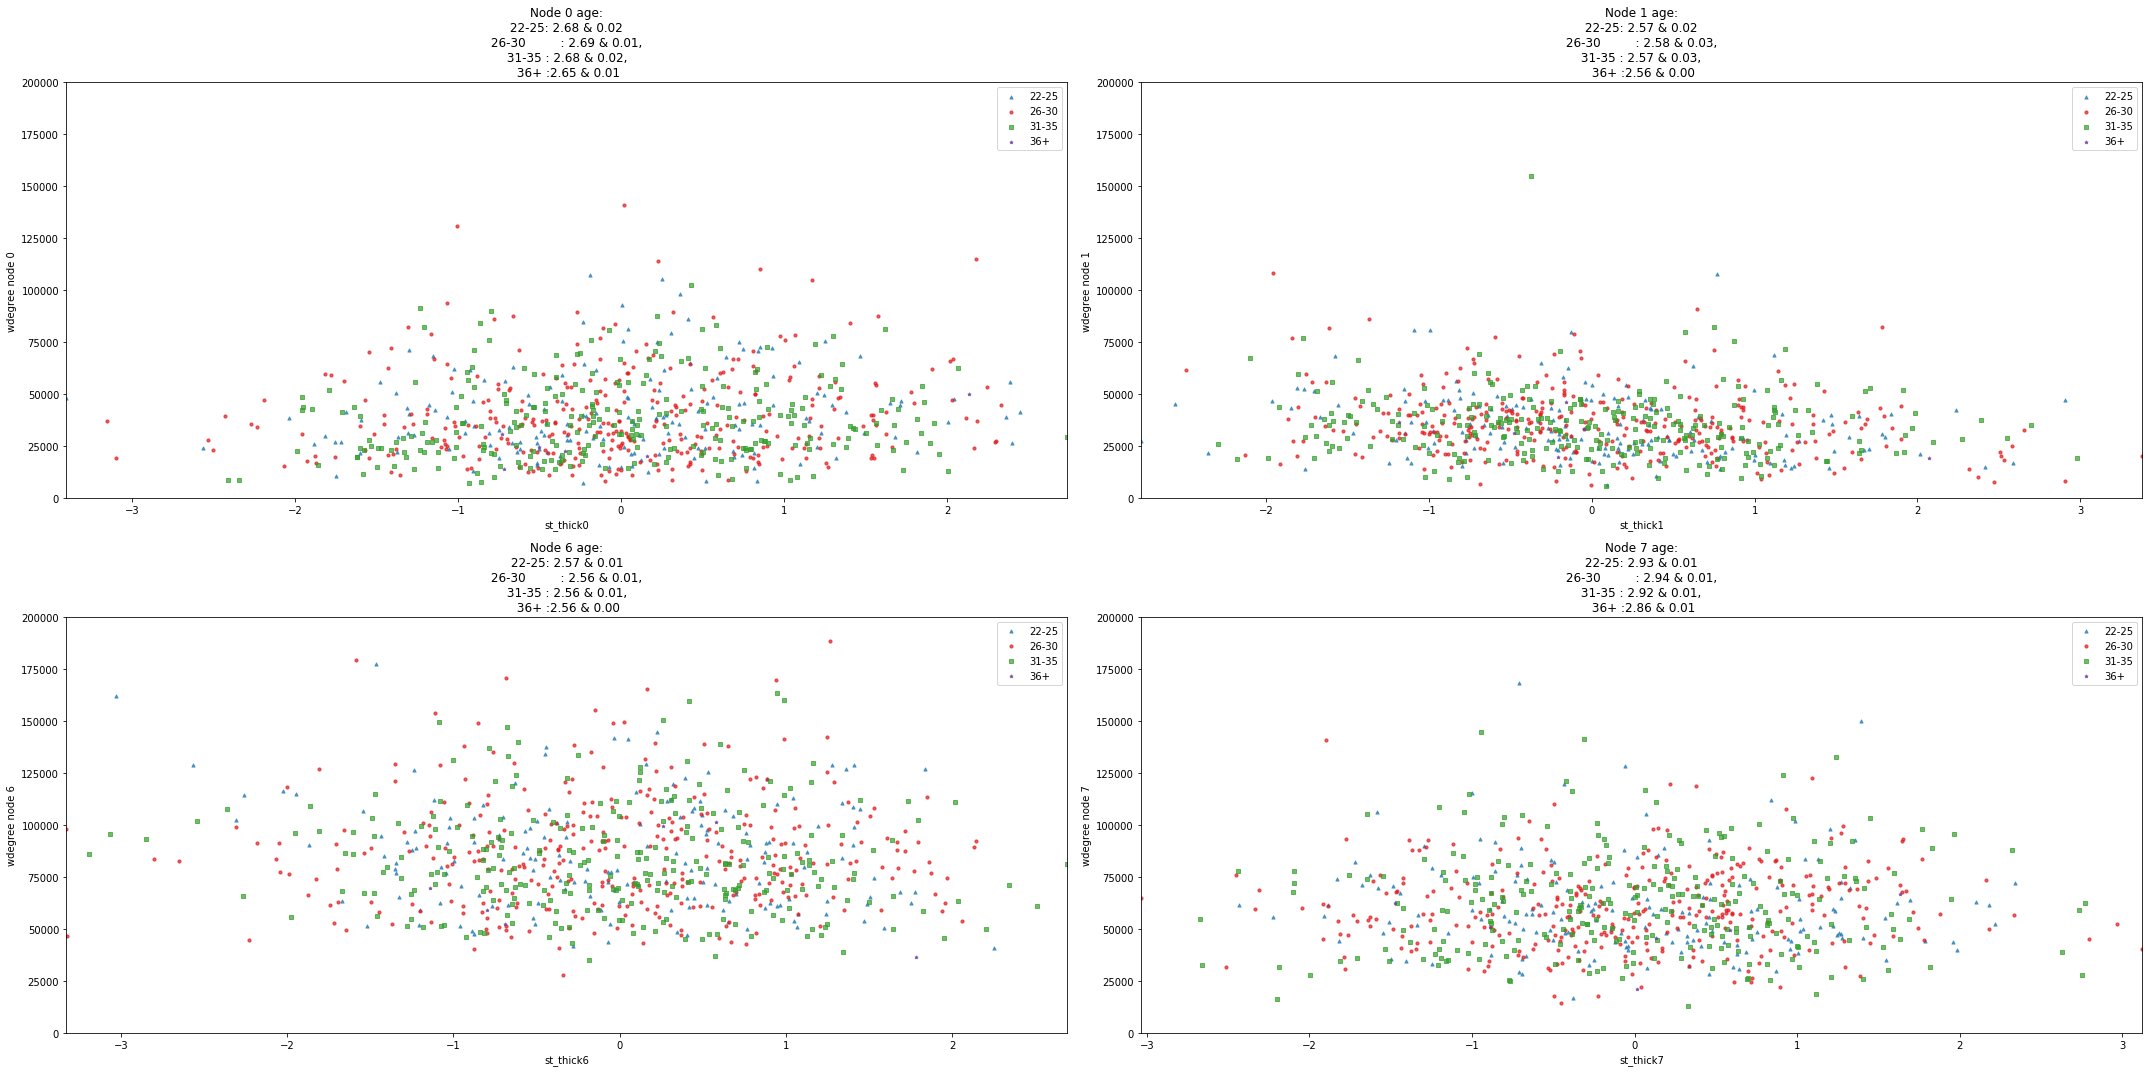

In [211]:
fig, ax = plt.subplots(2,2, figsize = (30,15))
for i in range(0,2):
    for j in range(0,2):
        if i == 5:
            if j == 4:
                break
        ax[i, j].scatter(st_age0_think[:, idx[i,j]], wdeg[age0_idx, idx[i,j]],
                         marker = '^', c = cmap_age[legend_age['22-25']], 
                        s = 10, alpha = 0.7, label = '22-25')
        
        ax[i, j].scatter(st_age1_think[:, idx[i,j]], wdeg[age1_idx, idx[i,j]],
                        marker = 'o', c = cmap_age[legend_age['26-30']],
                        s = 10, alpha = 0.7, label = '26-30')
        
        ax[i, j].scatter(st_age2_think[:, idx[i,j]], wdeg[age2_idx, idx[i,j]],
                        marker = 's', c = cmap_age[legend_age['31-35']],
                        s = 10, alpha = 0.7, label = '31-35')
        
        ax[i, j].scatter(st_age3_think[:, idx[i,j]], wdeg[age3_idx, idx[i,j]],
                        marker = '*', c = cmap_age[legend_age['36+']],
                        s = 10, alpha = 0.7, label = '36+')
        ax[i, j].legend()
        
        ax[i, j].set_title("Node {0:.0f} age:\n 22-25: {1:.2f} & {2:.2f} \n 26-30 \
        : {3:.2f} & {4:.2f}, \n 31-35 : {5:.2f} & {6:.2f}, \n 36+ :{7:.2f} & {8:.2f}".format(idx[i,j], 
                                        age0_mean_think[idx[i,j]], age0_var_think[idx[i,j]],
                                        age1_mean_think[idx[i,j]], age1_var_think[idx[i,j]],
                                        age2_mean_think[idx[i,j]], age2_var_think[idx[i,j]],
                                        age3_mean_think[idx[i,j]], age3_var_think[idx[i,j]]))
        
        ax[i, j].set_xlabel('st_thick' + str(idx[i,j]))
        ax[i, j].set_ylabel('wdegree node ' + str(idx[i,j]))
        min_age = min(np.concatenate([st_age0_think[:,idx[i,j]], st_age1_think[:,idx[i,j]],
                                     st_age2_think[:,idx[i,j]], st_age3_think[:,idx[i,j]]]).reshape(-1))
        max_age = max(np.concatenate([st_age0_think[:,idx[i,j]], st_age1_think[:,idx[i,j]],
                                     st_age2_think[:,idx[i,j]], st_age3_think[:,idx[i,j]]]).reshape(-1))
        ax[i, j].set_xlim([min_age,max_age])
        ax[i, j].set_ylim([min_wdeg, 200000])
plt.tight_layout()
plt.savefig( 'ages_thinkness_to_wdeg', dpi = 200)

In [211]:
a = set(man_idx)
b = set(age0_idx)
c0 = a.intersection(b)
c0 = np.array(list(c0))

age0_man = roi_think[c0]
st_age0_man = sc.fit_transform(age0_man)
age0_man_mean = sc.mean_
age0_man_var = sc.var_

b = set(age2_idx)
c2 = np.array(list(a.intersection(b)))
age2_man = roi_think[c2]
st_age2_man = sc.fit_transform(age2_man)
age2_man_mean = sc.mean_
age2_man_var = sc.var_



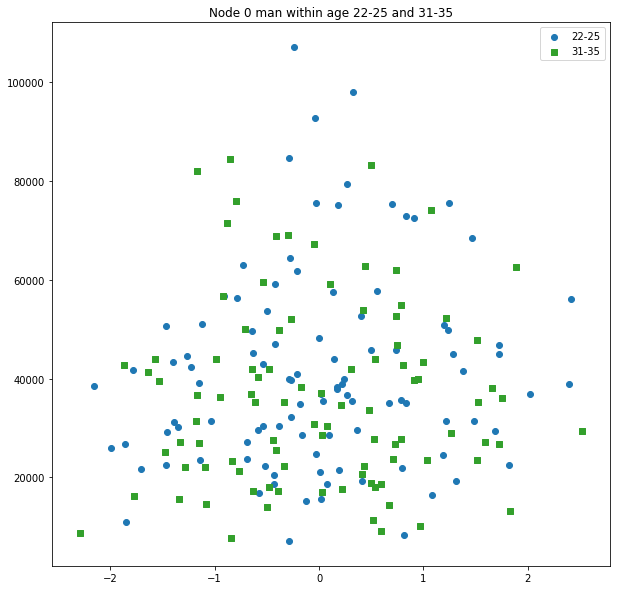

In [213]:
i = 0
j = 0
plt.figure(figsize = (10,10))
plt.scatter(st_age0_man[:, idx[i,j]], wdeg[c0, idx[i,j]],
                         marker = 'o', c = cmap_age[legend_age['22-25']], 
                        label = '22-25')

# plt.scatter(st_age1_think[:, idx[i,j]], wdeg[age1_idx, idx[i,j]],
#                 marker = 'o', c = cmap_age[legend_age['26-30']],
#                 s = 10, alpha = 0.7, label = '26-30')

plt.scatter(st_age2_man[:, idx[i,j]], wdeg[c2, idx[i,j]],
                marker = 's', c = cmap_age[legend_age['31-35']],
                 label = '31-35')

# plt.scatter(st_age3_think[:, idx[i,j]], wdeg[age3_idx, idx[i,j]],
#                 marker = 's', c = cmap_age[legend_age['36+']],
#                 s = 50, alpha = 0.7, label = '36+')
plt.title('Node '+ str(idx[i,j])  + ' man within age 22-25 and 31-35')
plt.legend()
plt.savefig('man_to_ages_thick')

In [214]:
a = set(woman_idx)
b = set(age0_idx)
c0 = a.intersection(b)
c0 = np.array(list(c0))

age0_woman = roi_think[c0]
st_age0_woman = sc.fit_transform(age0_woman)
age0_woman_mean = sc.mean_
age0_woman_var = sc.var_

b = set(age2_idx)
c2 = np.array(list(a.intersection(b)))
age2_woman = roi_think[c2]
st_age2_woman = sc.fit_transform(age2_woman)
age2_woman_mean = sc.mean_
age2_woman_var = sc.var_



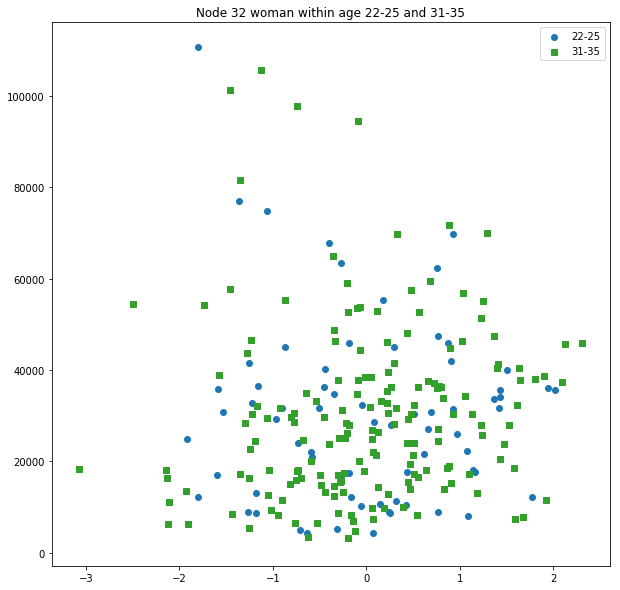

In [215]:
i = 5
j = 2
plt.figure(figsize = (10,10))
plt.scatter(st_age0_woman[:, idx[i,j]], wdeg[c0, idx[i,j]],
                         marker = 'o', c = cmap_age[legend_age['22-25']], 
                         label = '22-25')

# plt.scatter(st_age1_think[:, idx[i,j]], wdeg[age1_idx, idx[i,j]],
#                 marker = 'o', c = cmap_age[legend_age['26-30']],
#                 s = 10, alpha = 0.7, label = '26-30')

plt.scatter(st_age2_woman[:, idx[i,j]], wdeg[c2, idx[i,j]],
                marker = 's', c = cmap_age[legend_age['31-35']],
                 label = '31-35')

# plt.scatter(st_age3_think[:, idx[i,j]], wdeg[age3_idx, idx[i,j]],
#                 marker = 's', c = cmap_age[legend_age['36+']],
#                 s = 50, alpha = 0.7, label = '36+')
plt.title('Node '+ str(idx[i,j])  + ' woman within age 22-25 and 31-35')
plt.legend()
plt.savefig('woman_to_age_thick', )

In [176]:
def topk_degrees(dataset, k=10, subj_num=None):
    '''    
     input
     
     dataset - array n x 68 x 68
     k - number of heaviest nodes to consider (from each matrix)
     subj_num - number of subjects to choose final indices
     
     output
     
     node ids with nodes which have highest degree among all subjects (0..68)
     frequencies of these nodes (0..n)
    '''
     
    if subj_num is None:
        subj_num = int(dataset.shape[0]/2)
    
    degrees = dataset.sum(axis=1) # array n x 68
    topk_dgr_ind = []
    
    for row in degrees:
        order = np.argsort(row) 
        topk_dgr_ind.append(order[:k]) # take top k heaviest nodes
        
    topk_dgr_ind = np.hstack(topk_dgr_ind)
    nodes_id, freq = np.unique(topk_dgr_ind, return_counts=True) # compute number of times i'th node
    # is heavy among all subjects, if this number is bigger than subj_num we will choose it later
    
    return nodes_id[freq > subj_num], freq[freq > subj_num]

def botk_degrees(dataset, k=10, subj_num=None):
    '''    
     input
     
     dataset - array n x 68 x 68
     k - number of heaviest nodes to consider (from each matrix)
     subj_num - number of subjects to choose final indices
     
     output
     
     node ids with nodes which have highest degree among all subjects (0..68)
     frequencies of these nodes (0..n)
    '''
     
    if subj_num is None:
        subj_num = int(dataset.shape[0]/2)
    
    degrees = dataset.sum(axis=1) # array n x 68
    topk_dgr_ind = []
    
    for row in degrees:
        order = np.argsort(row) 
        topk_dgr_ind.append(order[-k:]) # take top k heaviest nodes
        
    topk_dgr_ind = np.hstack(topk_dgr_ind)
    nodes_id, freq = np.unique(topk_dgr_ind, return_counts=True) # compute number of times i'th node
    # is heavy among all subjects, if this number is bigger than subj_num we will choose it later
    
    return nodes_id[freq > subj_num], freq[freq > subj_num]

In [177]:
def topk_thick(degrees, k=10, subj_num=None):
    '''    
     input
     
     dataset - array n x 68 x 68
     k - number of heaviest nodes to consider (from each matrix)
     subj_num - number of subjects to choose final indices
     
     output
     
     node ids with nodes which have highest degree among all subjects (0..68)
     frequencies of these nodes (0..n)
    '''
     
    if subj_num is None:
        subj_num = int(degrees.shape[0]/2)
    
     # array n x 68
    topk_dgr_ind = []
    
    for row in degrees:
        order = np.argsort(row) 
        topk_dgr_ind.append(order[:k]) # take top k heaviest nodes
        
    topk_dgr_ind = np.hstack(topk_dgr_ind)
    nodes_id, freq = np.unique(topk_dgr_ind, return_counts=True) # compute number of times i'th node
    # is heavy among all subjects, if this number is bigger than subj_num we will choose it later
    
    return nodes_id[freq > subj_num], freq[freq > subj_num]

def botk_thick(degrees, k=10, subj_num=None):
    '''    
     input
     
     dataset - array n x 68 x 68
     k - number of heaviest nodes to consider (from each matrix)
     subj_num - number of subjects to choose final indices
     
     output
     
     node ids with nodes which have highest degree among all subjects (0..68)
     frequencies of these nodes (0..n)
    '''
     
    if subj_num is None:
        subj_num = int(degrees.shape[0]/2)
    
    #degrees = dataset.sum(axis=1) # array n x 68
    topk_dgr_ind = []
    
    for row in degrees:
        order = np.argsort(row) 
        topk_dgr_ind.append(order[-k:]) # take top k heaviest nodes
        
    topk_dgr_ind = np.hstack(topk_dgr_ind)
    nodes_id, freq = np.unique(topk_dgr_ind, return_counts=True) # compute number of times i'th node
    # is heavy among all subjects, if this number is bigger than subj_num we will choose it later
    
    return nodes_id[freq > subj_num], freq[freq > subj_num]

In [181]:
top_nodes, top_freq_nodes = topk_degrees(Y, k = 10)
bot_nodes, bot_freq_nodes = botk_degrees(Y, k = 10)
top_nodes, bot_nodes

(array([ 4, 14, 17, 30, 31, 38, 51, 65, 66]),
 array([23, 25, 26, 27, 57, 60, 61]))

In [180]:
top_nodes, top_freq_nodes = topk_degrees(Y, k = 2)
bot_nodes, bot_freq_nodes = botk_degrees(Y, k = 2)
top_nodes, bot_nodes

(array([ 4, 38]), array([26, 60]))

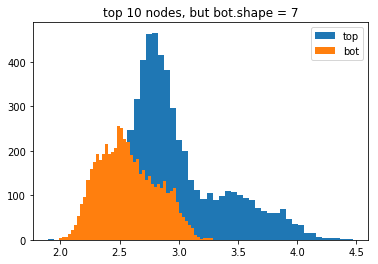

In [184]:
top_thick = roi_think[:, top_nodes[:4].tolist() + top_nodes[6:].tolist()]
bot_thick = roi_think[:, bot_nodes]
plt.hist(top_thick.reshape(-1), bins = 50, label = 'top')
plt.hist(bot_thick.reshape(-1), bins = 50, label = 'bot');
plt.legend();
# plt.title('38 - top mean & std: {0:.3f} & {1:.3f} \n 60 - bot mean & std: {2:.3f} & {3:.3f}'.format(top_thick.mean(),
#                                                                                           top_thick.std(),
#                                                                                           bot_thick.mean() , 
#                                                                                           bot_thick.std()))
plt.title('top 10 nodes, but bot.shape = 7')
plt.savefig('7_top_bot_hist', dpi = 200)

In [222]:
top_thick.mean(), top_thick.std(), bot_thick.mean() , bot_thick.std()

(3.4267182, 0.22505398, 2.8886688, 0.12647474)

In [223]:
from scipy.stats import ttest_ind
t, p = ttest_ind(top_thick, bot_thick)
print(p)

0.0


In [178]:
top_vol, freq_top_vol = topk_thick(roi_vol, k = 10)
bot_vol, freq_bot_vol = botk_thick(roi_vol, k = 10)
top_vol, bot_vol

(array([ 8, 20, 21, 33, 42, 54, 66, 67]),
 array([ 7, 13, 25, 30, 31, 41, 47, 51, 59, 64, 65]))

In [227]:
top_vol, freq_top_vol = topk_thick(roi_vol, k = 2)
bot_vol, freq_bot_vol = botk_thick(roi_vol, k = 2)
top_vol, bot_vol

(array([ 8, 42]), array([51]))

In [228]:
freq_top_vol, freq_bot_vol

(array([582, 483]), array([469]))

In [229]:
deg_top_vol = Y.sum(axis = -1)[:, [42]]
deg_bot_vol = Y.sum(axis = -1)[:, [51]]

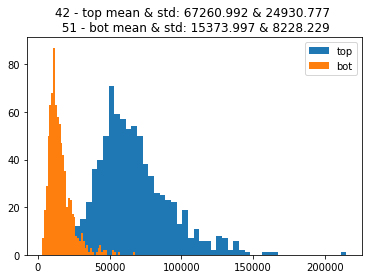

In [231]:
plt.hist(deg_top_vol.reshape(-1), bins=50, label = 'top')
plt.hist(deg_bot_vol.reshape(-1), bins = 50, label = 'bot')
plt.title('42 - top mean & std: {0:.3f} & {1:.3f} \n 51 - bot mean & std: {2:.3f} & {3:.3f}'.format(deg_top_vol.mean(),
                                                                                          deg_top_vol.std(),
                                                                                          deg_bot_vol.mean() , 
                                                                                          deg_bot_vol.std()))
plt.legend();
plt.savefig('1_vol_top_bot_hist')

In [232]:
ttest_ind(deg_top_vol, deg_bot_vol)

Ttest_indResult(statistic=array([ 55.47969055], dtype=float32), pvalue=array([ 0.]))

In [164]:
top_thickness, top_thick_freq = topk_thick(roi_think, k = 2)
bot_thickness, bot_thick_freq = botk_thick(roi_think, k = 2)
top_thickness, bot_thickness

(array([19, 53]), array([31, 65]))

In [165]:
top_thickness, top_thick_freq = topk_thick(roi_vol, k = 2)
bot_thickness, bot_thick_freq = botk_thick(roi_vol, k = 2)

In [166]:
top_thickness, bot_thickness, 

(array([ 8, 42]), array([51]))

In [163]:
new_Y = Y[subj_idx_un,:,:]

In [123]:
new_Y.shape
new_roi = roi_think[subj_idx_un, :]

In [134]:
top_nodes, top_freq = topk_degrees(new_Y, k = 10)
bot_nodes, bot_freq = botk_degrees(new_Y, k = 10)

In [135]:
top_nodes, bot_nodes

(array([ 4, 14, 17, 30, 31, 38, 51, 65, 66]),
 array([23, 25, 26, 27, 57, 60, 61]))

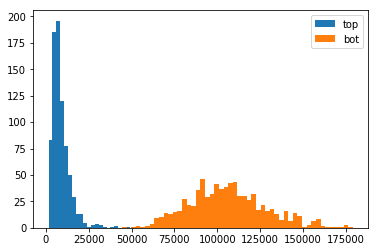

In [173]:
# объемы ! топ и бот 
top_thick = Y.sum(axis = -1)[:, top_nodes[-1]]
bot_thick = Y.sum(axis = -1)[:, bot_nodes[-1]]
plt.hist(top_thick.reshape(-1), bins = 50, label = 'top')
plt.hist(bot_thick.reshape(-1), bins = 50, label = 'bot');
plt.legend();

In [167]:
top_thick = new_roi[:, top_nodes[-1]]
bot_thick = new_roi[:, bot_nodes[-1]]

In [168]:
top_deg = new_Y.sum(axis = -1)[:, top_thickness[:3]]
bot_deg = new_Y.sum(axis = -1)[:, bot_thickness[:3]]

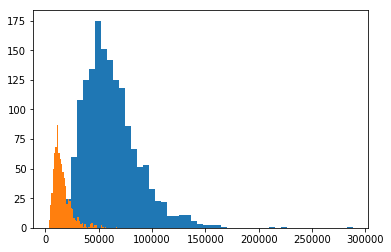

In [169]:
plt.hist(top_deg.reshape(-1), bins = 50)
plt.hist(bot_deg.reshape(-1), bins = 50);

In [137]:
top_thick.mean(), top_thick.std(), bot_thick.mean(), bot_thick.std()

(2.9128771, 0.3191154, 2.5540137, 0.22972384)

In [ ]:
import scipy.stats import 

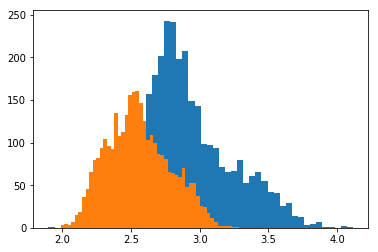

In [139]:
plt.hist(top_thick.reshape(-1), bins = 50)
plt.hist(bot_thick.reshape(-1), bins = 50);

ValueError: Invalid RGBA argument: 2

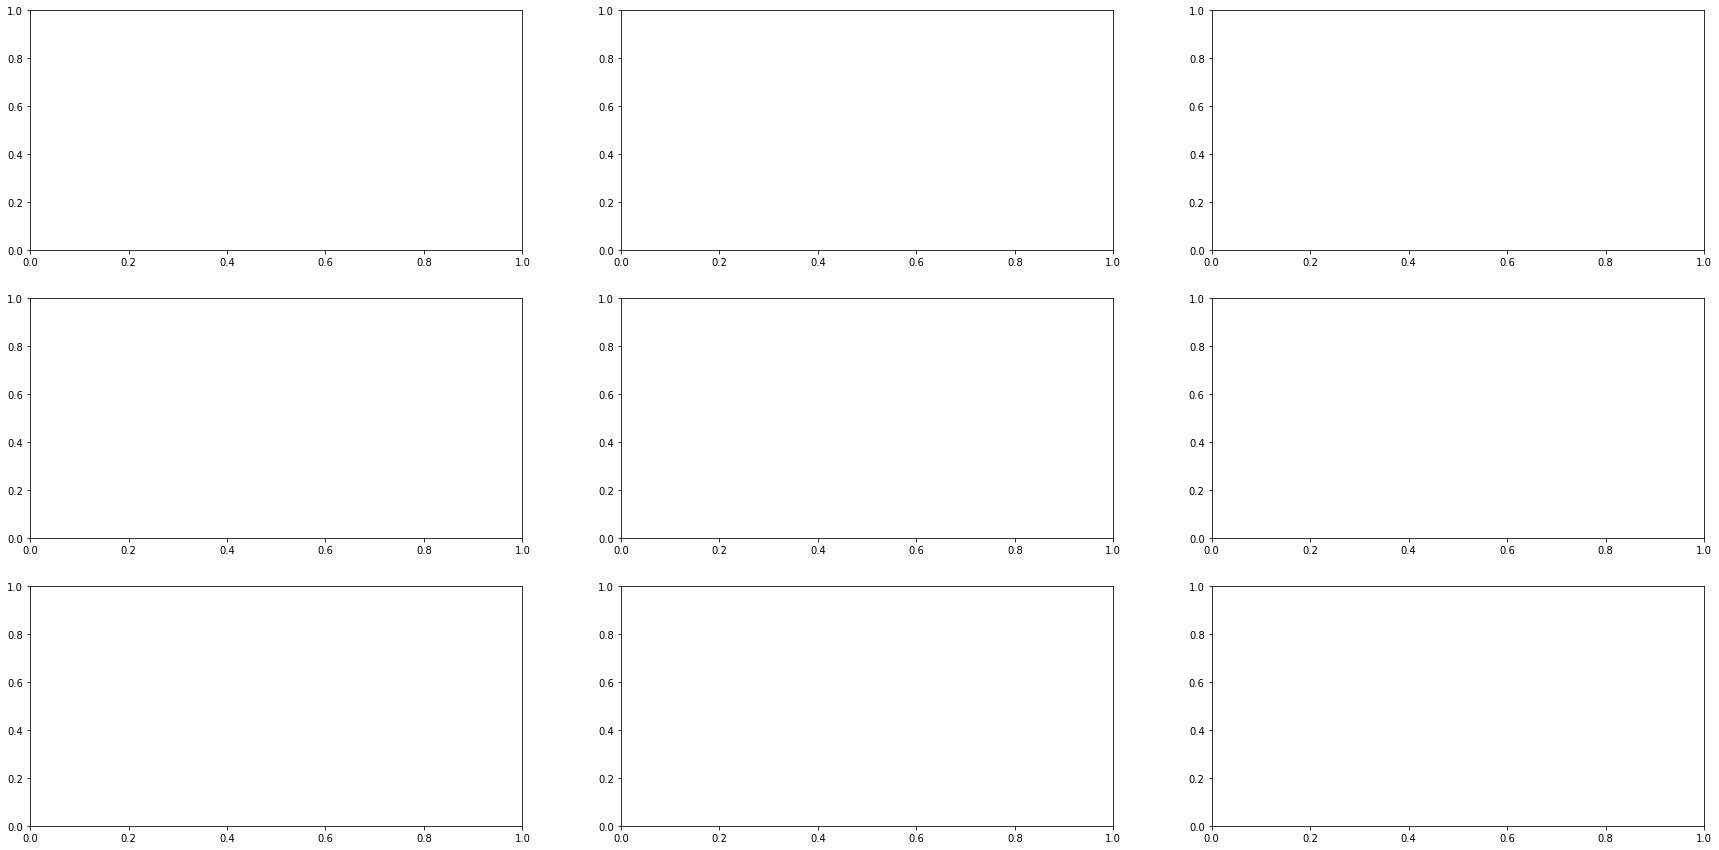

In [188]:
fig, ax = plt.subplots(3,3, figsize = (30,15))
for i in range(2,5):
    for j in range(2,5):
        if i == 5:
            if j == 4:
                break
        ax[i, j].scatter(st_think[np.ix_(subj_idx_un), idx[i,j]], wdeg[np.ix_(subj_idx_un),idx[i,j]], c= c )
        ax[i, j].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_think[idx[i,j]]) + 'and std = ' + str(std_think[idx[i,j]]))
        ax[i, j].set_xlabel('st thick for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('wdegree node ' + str(idx[i,j]))
        ax[i, j].set_xlim([min_st_think, max_st_think])
        ax[i, j].set_ylim([min_wdeg, max_wdeg])
plt.tight_layout()
plt.savefig( 'thinkness_to_wdeg', dpi = 200)

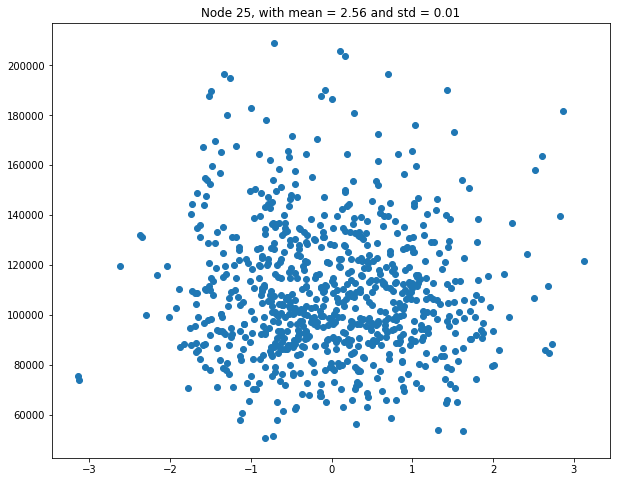

In [193]:
ax = plt.figure(figsize=(10,8))
idx = np.arange(36).reshape(6,6)
i = 4
j = 1
plt.scatter(st_think[:, idx[i,j]], wdeg[:,idx[i,j]]);
plt.title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_think[idx[i,j]]) + ' and std = ' + str(std_think[idx[i,j]]))
plt.savefig('roi_thick_to_wdeg_8')

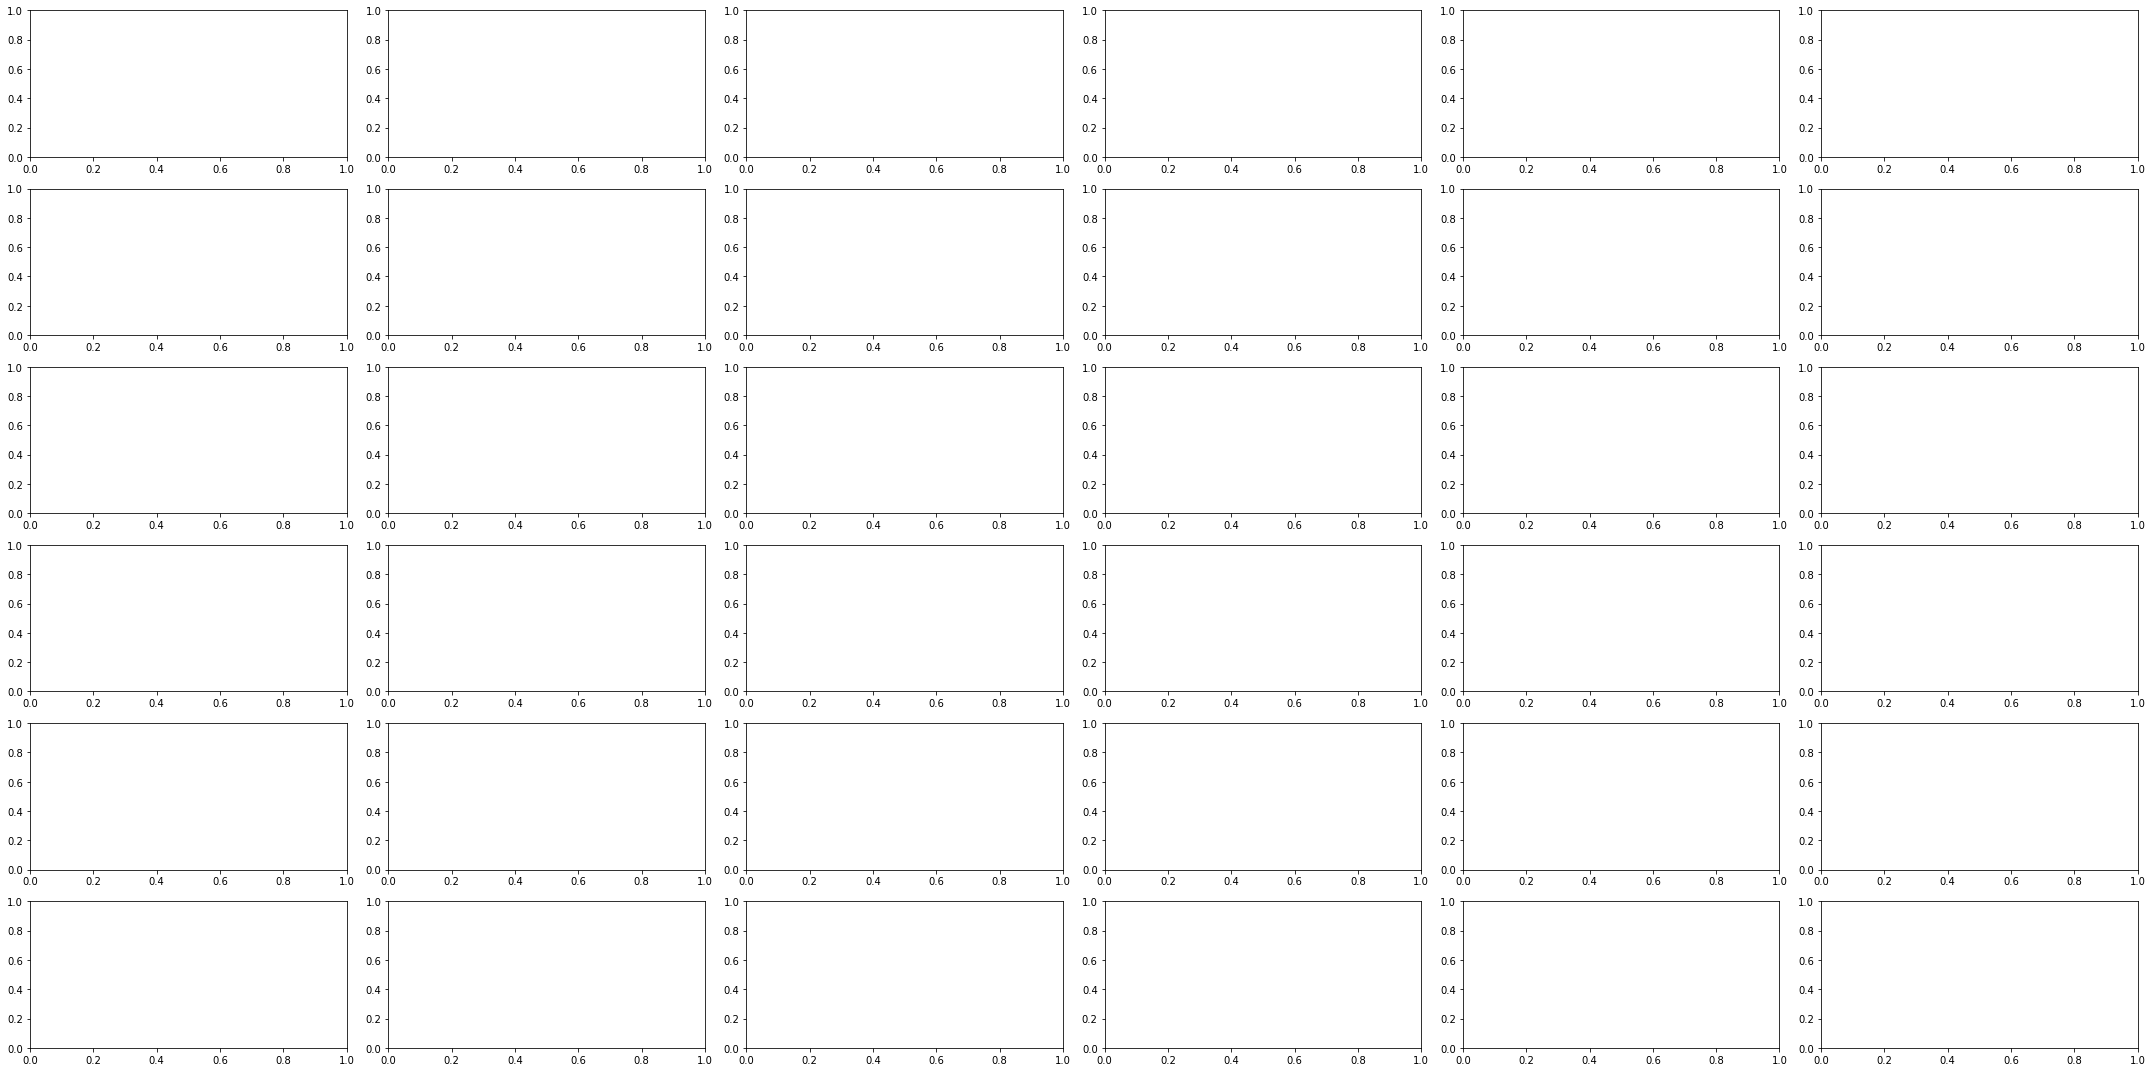

In [114]:
new_idx = np.where(c == 1)[0]
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6,6):
    for j in range(6,6):
        if i == 5:
            if j == 4:
                break
        ax[i-2, j-2].scatter(st_think[:, idx[i,j]], wdeg[:,idx[i,j]])
        ax[i-2, j-2].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_think[idx[i,j]]) + 'and std = ' + str(std_think[idx[i,j]]))
        ax[i-2, j-2].set_xlabel('st thick for ' + str(idx[i,j]) + 'node')
        ax[i-2, j-2].set_ylabel('wdegree node ' + str(idx[i,j]))
        ax[i-2, j-2].set_xlim([min_st_think, max_st_think])
        ax[i-2, j-2].set_ylim([min_wdeg, 200000])
plt.tight_layout()
plt.savefig( 'thinkness_to_wdeg', dpi = 200)

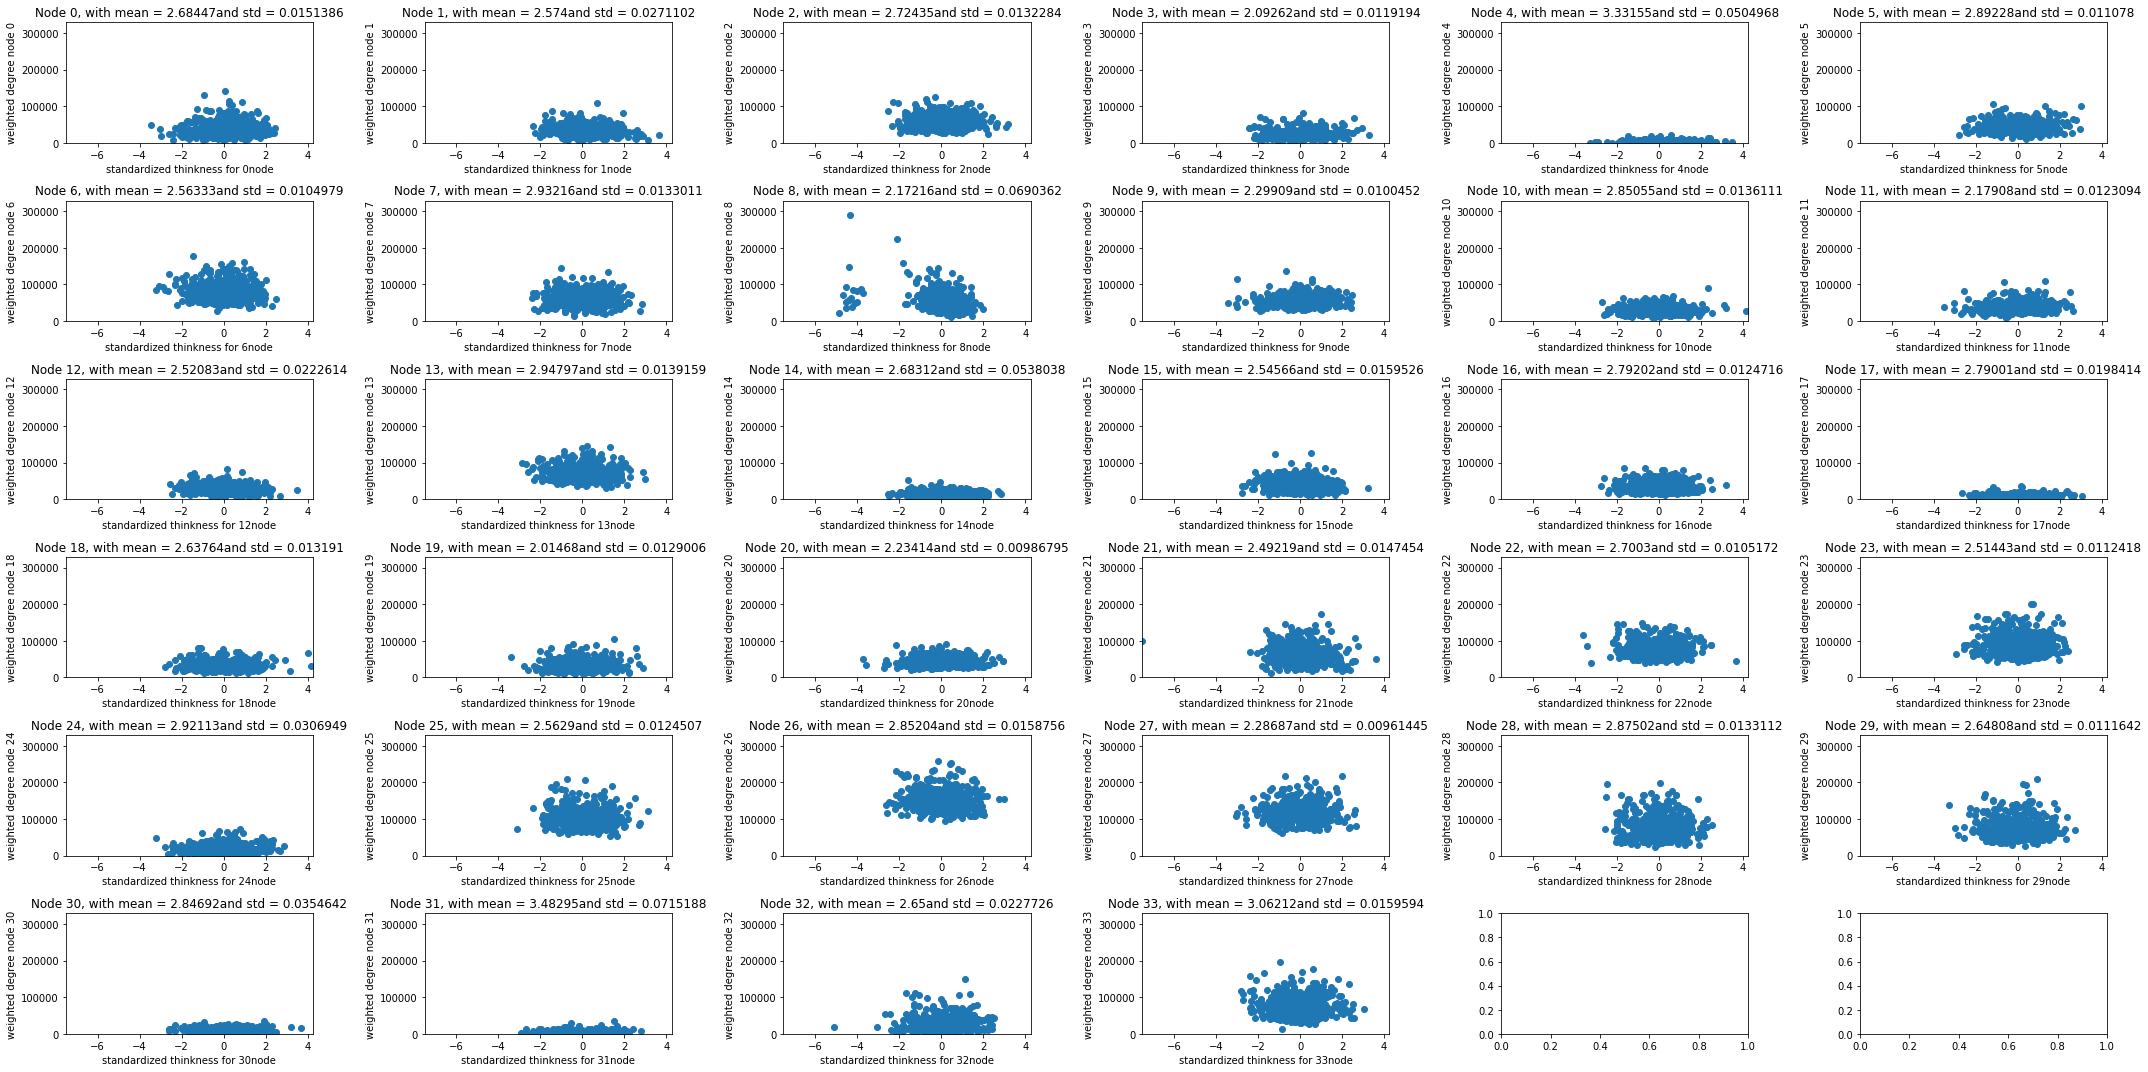

In [56]:
new_idx = np.where(c == 0)[0]
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break
        ax[i, j].scatter(st_think[np.ix_(new_idx), idx[i,j]], wdeg[np.ix_(new_idx),idx[i,j]])
        ax[i, j].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_think[idx[i,j]]) + 'and std = ' + str(std_think[idx[i,j]]))
        ax[i, j].set_xlabel('standardized thinkness for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('weighted degree node ' + str(idx[i,j]))
        ax[i, j].set_xlim([min_st_think, max_st_think])
        ax[i, j].set_ylim([min_wdeg, max_wdeg])
plt.tight_layout()
plt.savefig( 'woman_thinkness_to_wdeg', dpi = 500)

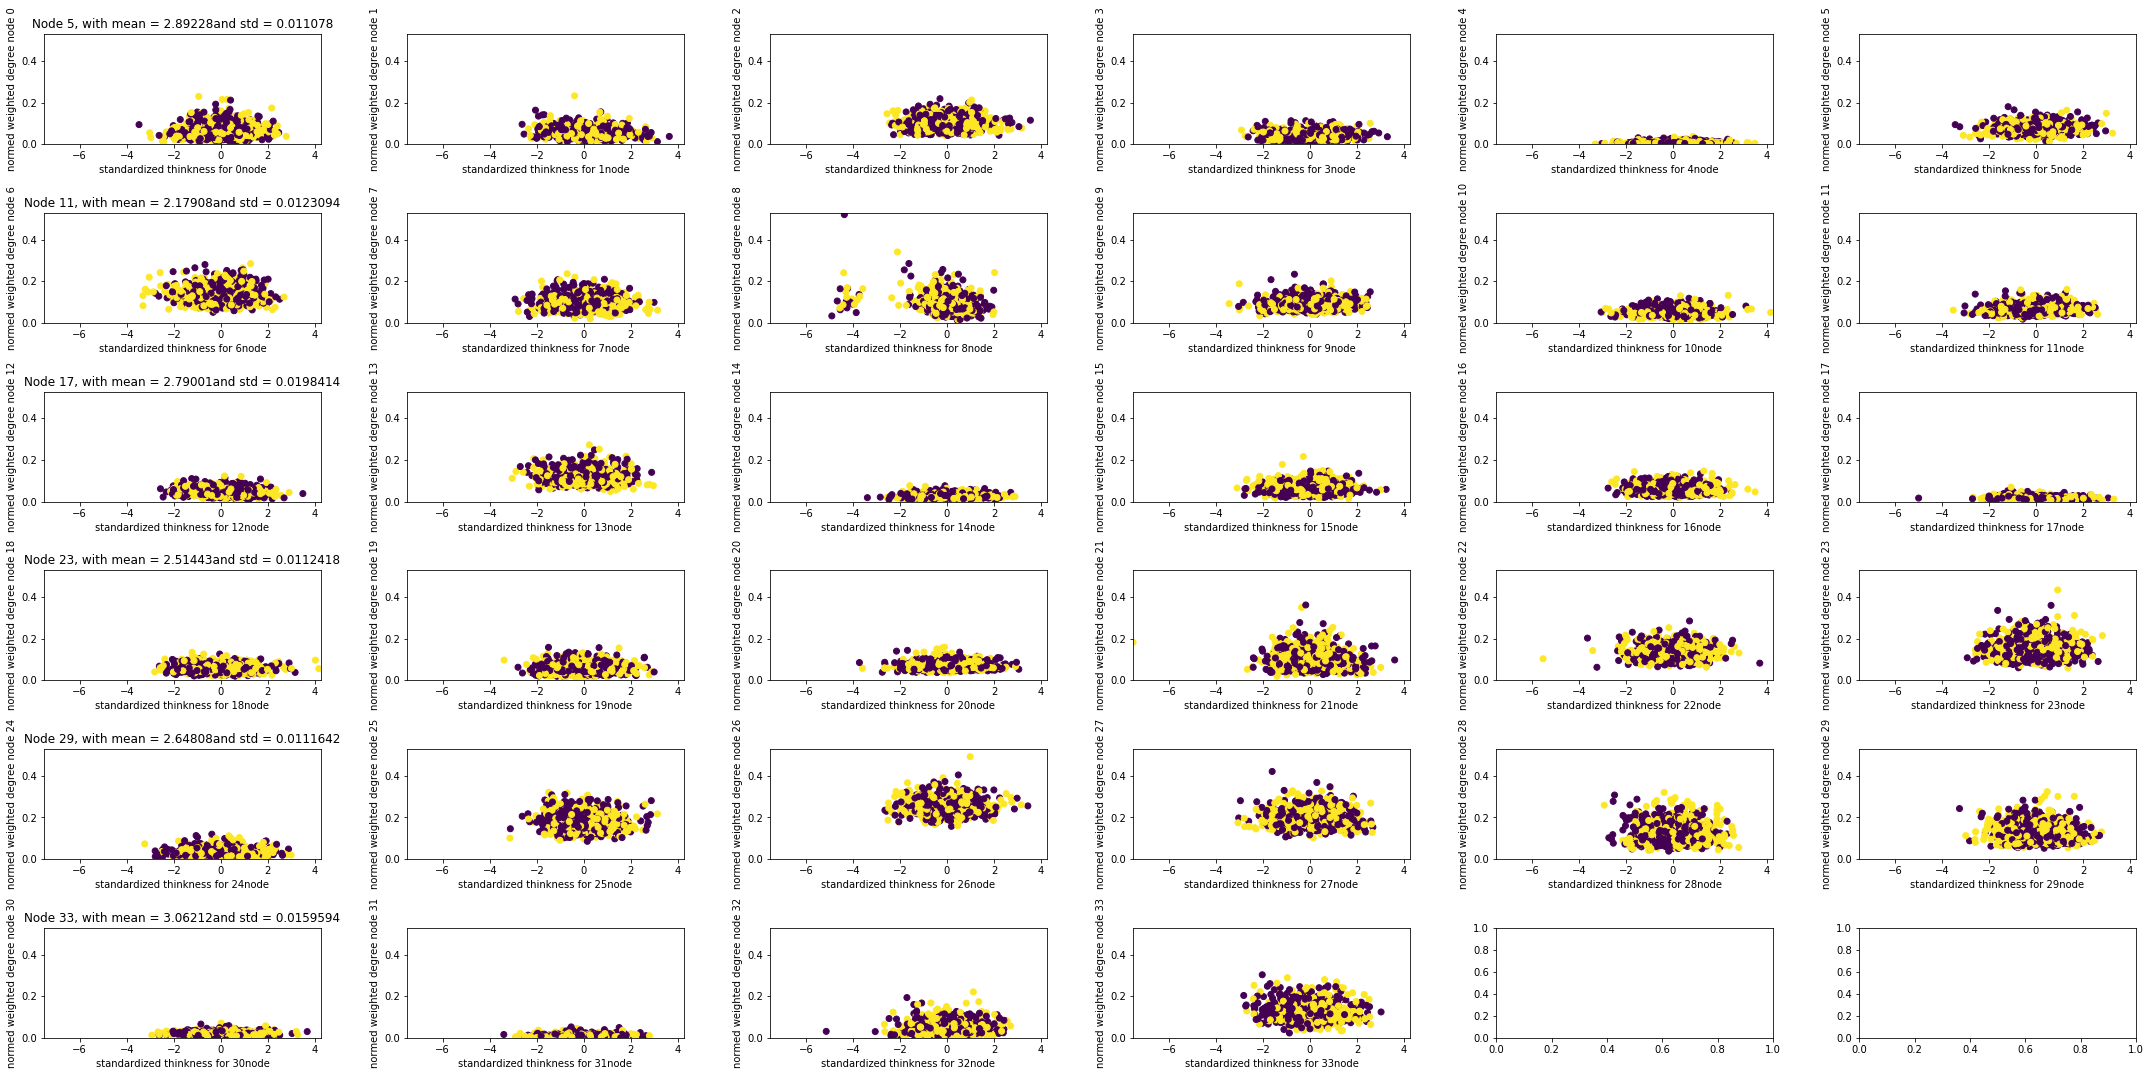

In [46]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break
        ax[i, j].scatter(st_think[np.ix_(subj_idx_un), idx[i,j]], norm_wdeg[np.ix_(subj_idx_un),idx[i,j]], c= c)
    #     ax[i, 1].scatter(st_think[:, 34 + i], norm_wdeg[:, 34+i])
        ax[i, 0].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_think[idx[i,j]]) + 'and std = ' + str(std_think[idx[i,j]]))

        ax[i, j].set_xlabel('standardized thinkness for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('normed weighted degree node ' + str(idx[i,j]))
        ax[i, j].set_xlim([min_st_think, max_st_think])
        ax[i, j].set_ylim([min_norm_wdeg, max_norm_wdeg])
plt.tight_layout()
plt.savefig('thinkness_to_norm_wdeg', dpi = 500)

# AREA

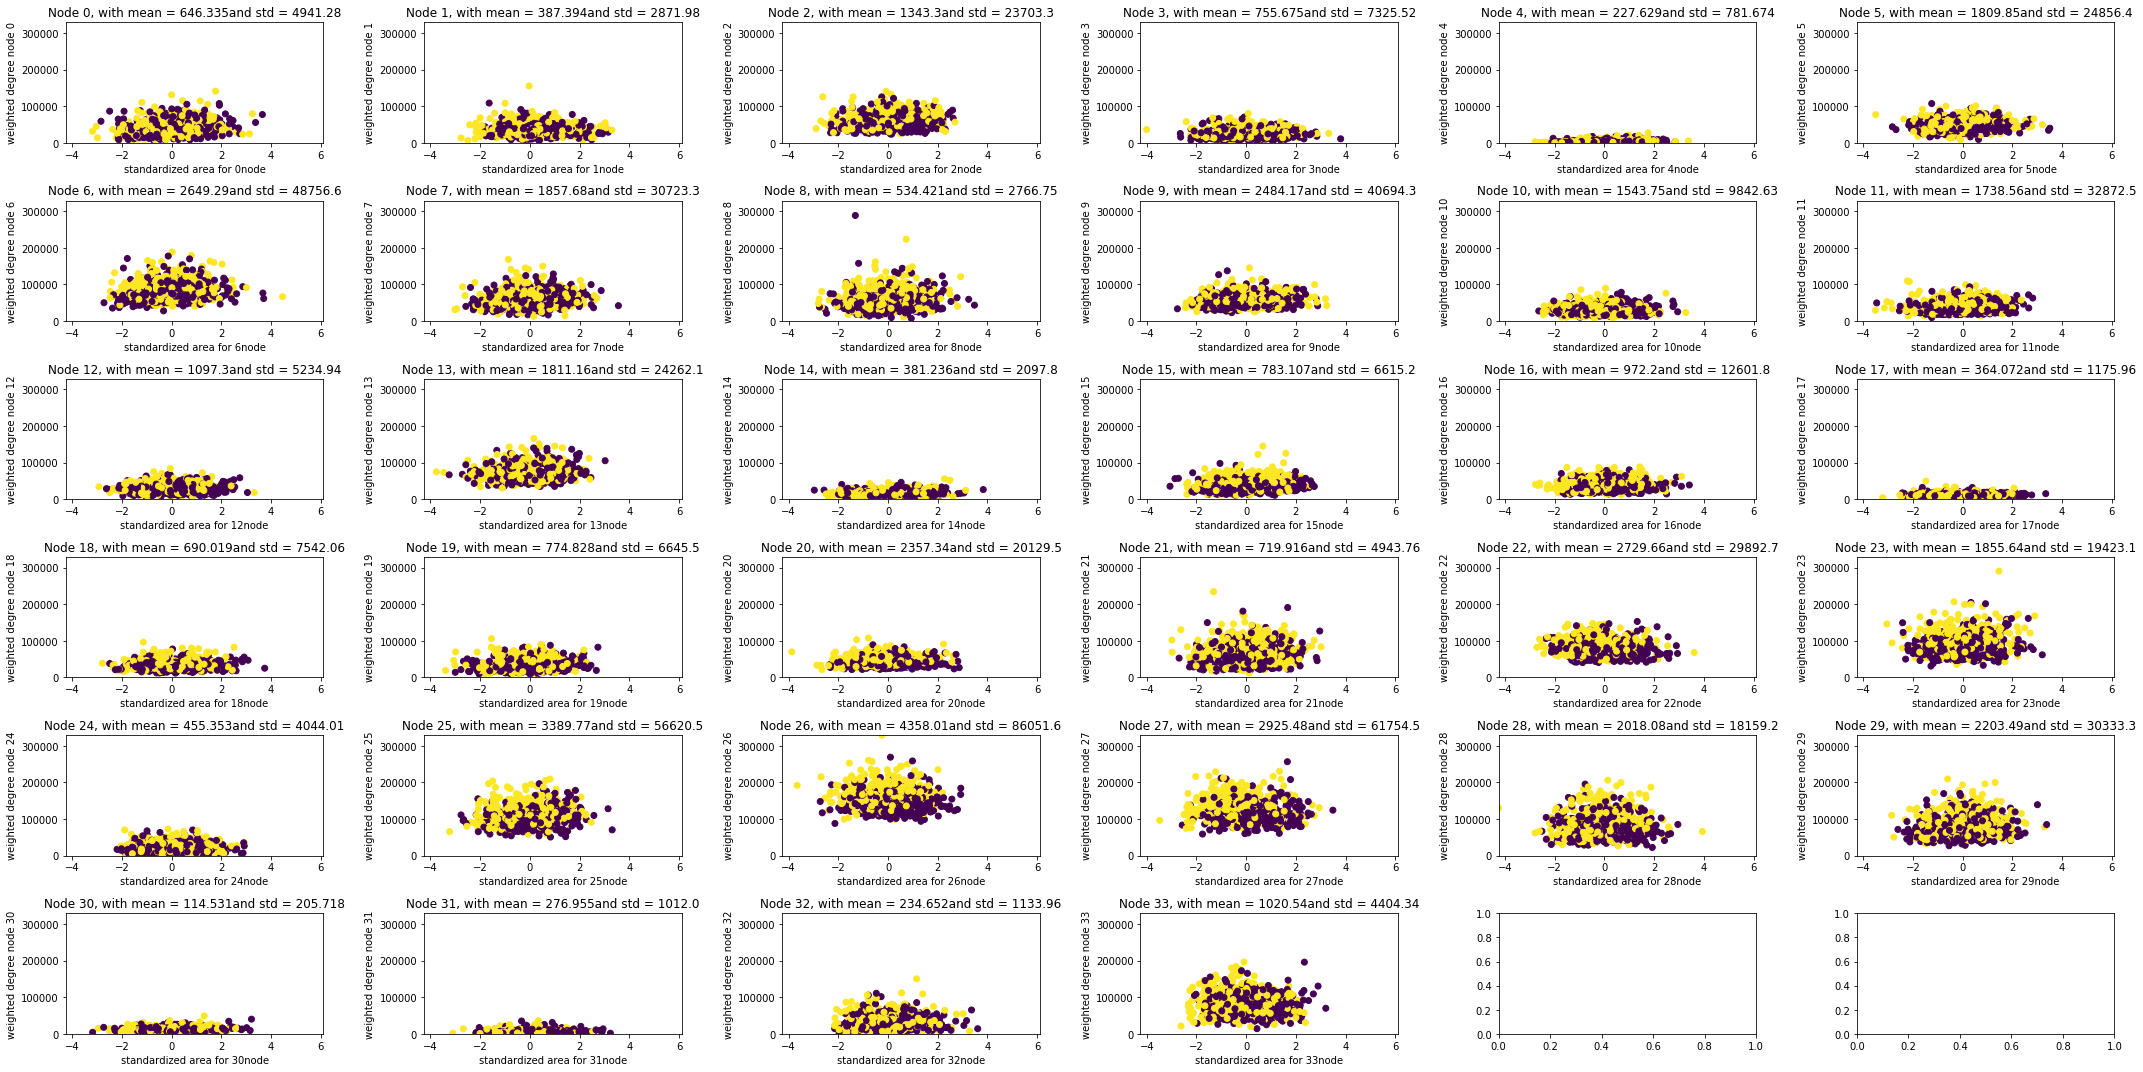

In [49]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break   
        ax[i, j].scatter(st_area[np.ix_(subj_idx_un), idx[i,j]], wdeg[np.ix_(subj_idx_un),idx[i,j]], c= c)
    #    ax[i, 1].scatter(st_area[:, 34 + i], wdeg[:, 34+i])
        ax[i, j].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_area[idx[i,j]]) + 'and std = ' + str(std_area[idx[i,j]]))

    #    ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_area[34 +i]) +'and std = ' + str(std_area[34 + i]))
        ax[i, j].set_xlabel('standardized area for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('weighted degree node ' + str(idx[i,j]))
    #    ax[i, 1].set_xlabel('standardized area for ' + str(34 + i) + 'node')
    #    ax[i, 1].set_ylabel('weighted degree node' + str(34 + i))
        ax[i, j].set_xlim([min_st_area, max_st_area])
        ax[i, j].set_ylim([min_wdeg, max_wdeg])
    #    ax[i, 1].set_xlim([min_st_area, max_st_area])
    #    ax[i, 1].set_ylim([min_wdeg, max_wdeg])
plt.tight_layout()
plt.savefig('area_to_wdeg', dpi = 500)

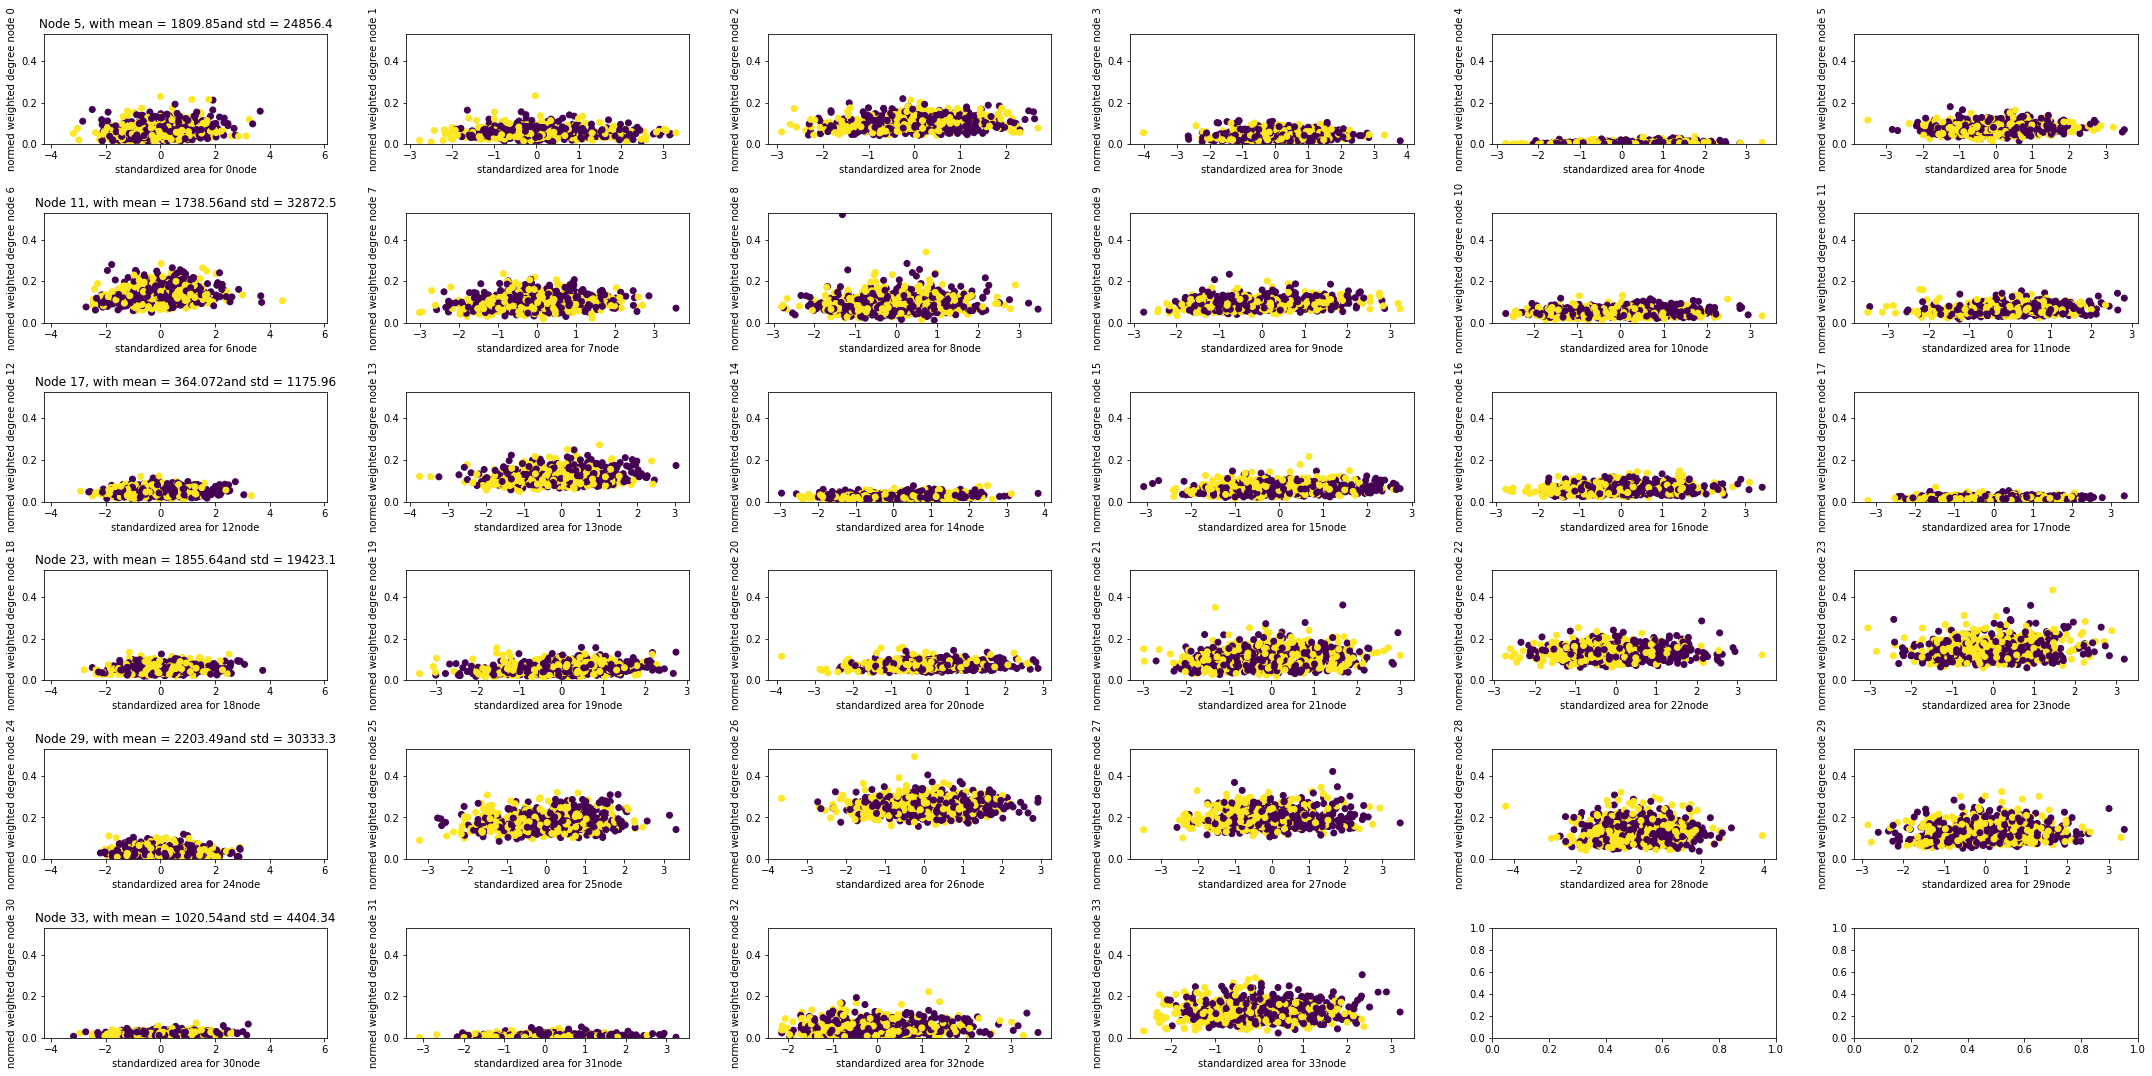

In [50]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break   
    
        ax[i, j].scatter(st_area[np.ix_(subj_idx_un), idx[i,j]], norm_wdeg[np.ix_(subj_idx_un),idx[i,j]], c= c)
        #ax[i, 1].scatter(st_area[:, 34 + i], norm_wdeg[:, 34+i])
        ax[i, 0].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_area[idx[i,j]]) + 'and std = ' + str(std_area[idx[i,j]]))

       #ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_area[34 +i]) +'and std = ' + str(std_area[34 + i]))
        ax[i, j].set_xlabel('standardized area for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('normed weighted degree node ' + str(idx[i,j]))
        #ax[i,j1].set_xlabel('standardized area for ' + str(34 + i) + 'node')
        #ax[i, 1].set_ylabel('normed weighted degree node' + str(34 + i))
        ax[i, 0].set_xlim([min_st_area, max_st_area])
        ax[i, j].set_ylim([min_norm_wdeg, max_norm_wdeg])
        #ax[i,j1].set_xlim([min_st_area, max_st_area])
        #ax[i, 1].set_ylim([min_norm_wdeg, max_norm_wdeg])
plt.tight_layout()
plt.savefig('area_to_norm_wdeg', dpi = 500)

# VOLUME

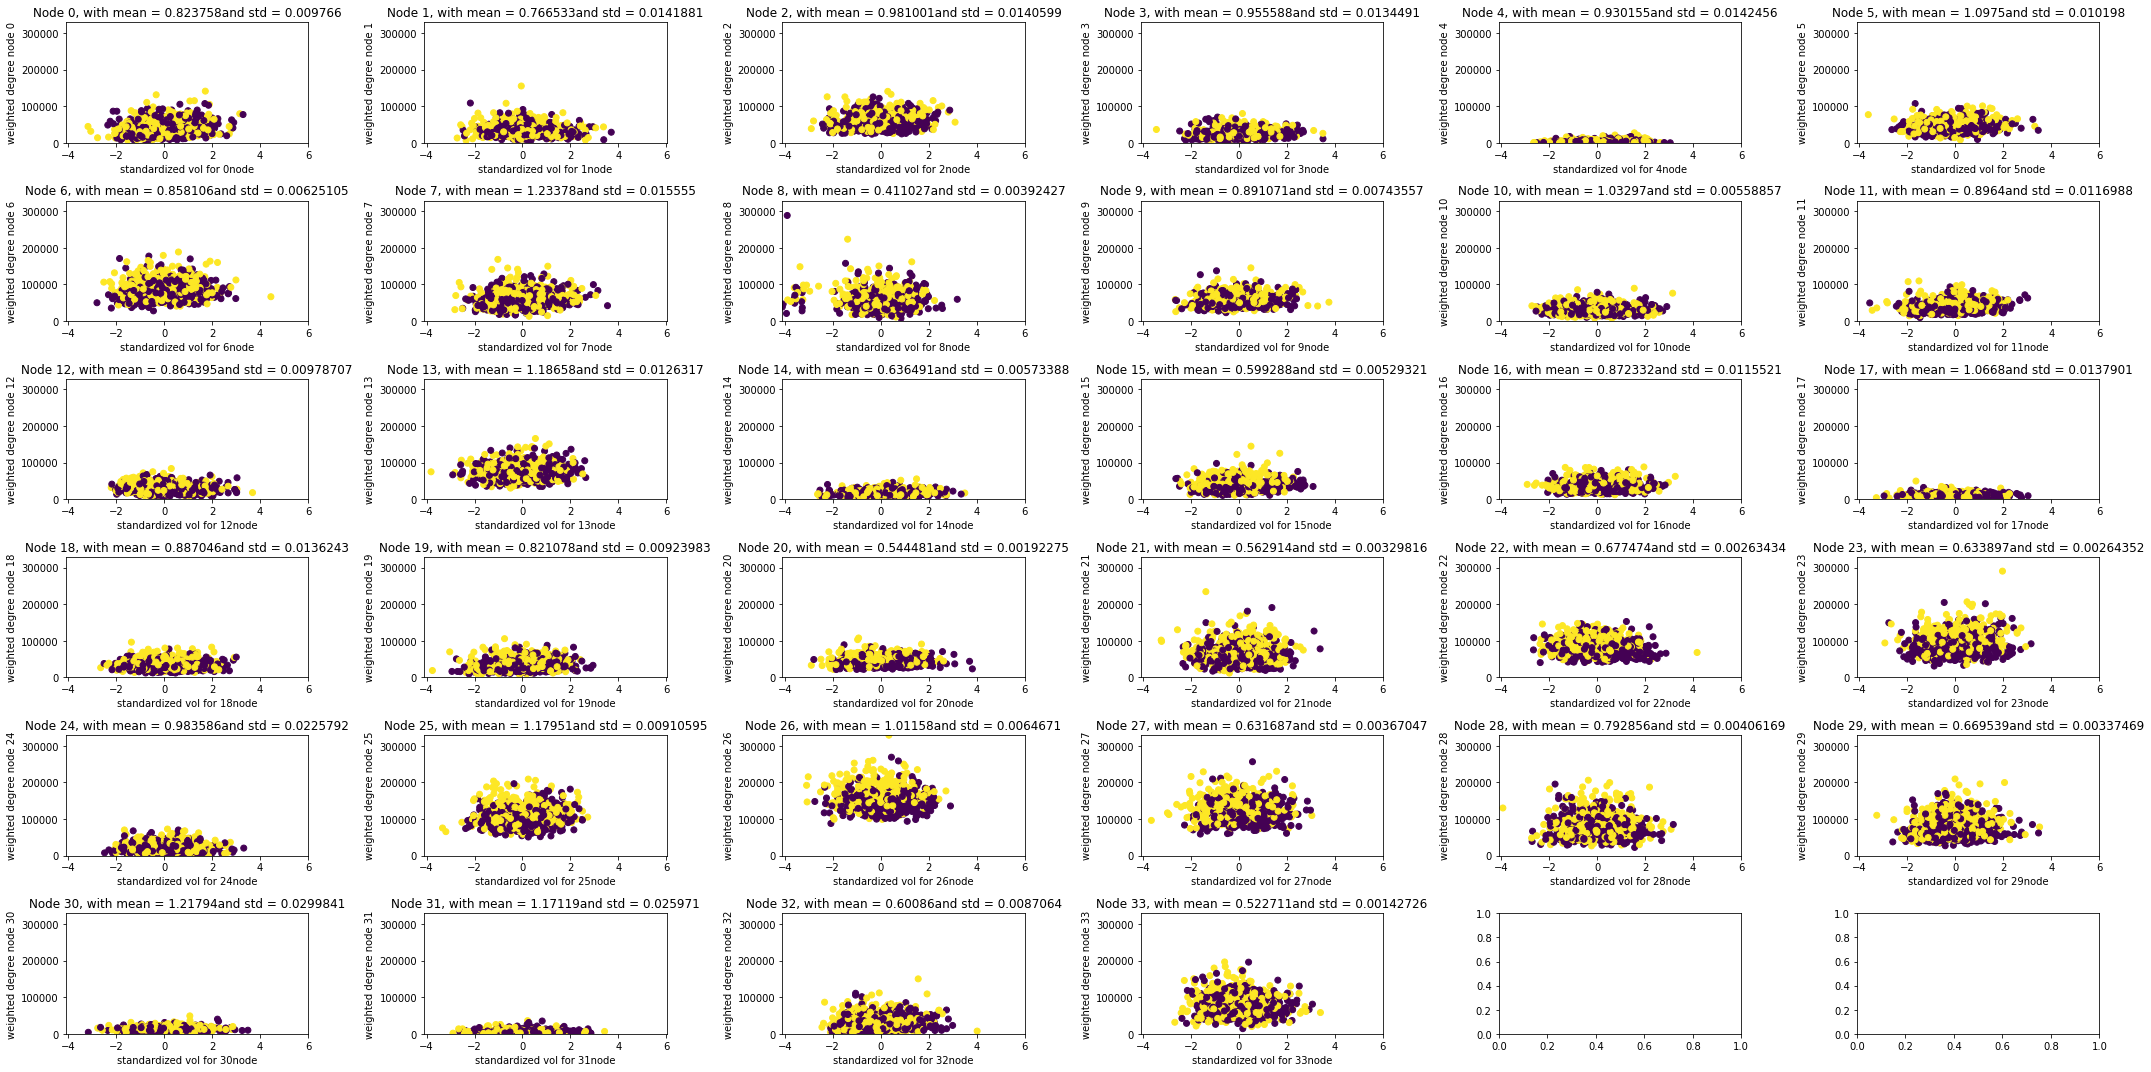

In [51]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break   

        ax[i, j].scatter(st_vol[np.ix_(subj_idx_un), idx[i,j]], wdeg[np.ix_(subj_idx_un),idx[i,j]], c= c)
        #ax[i, 1].scatter(st_vol[:, 34 + i], wdeg[:, 34+i])
        ax[i, j].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_vol[idx[i,j]]) + 'and std = ' + str(std_vol[idx[i,j]]))

        #ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_vol[34 +i]) +'and std = ' + str(std_vol[34 + i]))
        ax[i, j].set_xlabel('standardized vol for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('weighted degree node ' + str(idx[i,j]))
        #ax[i, 1].set_xlabel('standardized vol for ' + str(34 + i) + 'node')
        #ax[i, 1].set_ylabel('weighted degree node' + str(34 + i))
        ax[i, j].set_xlim([min_st_vol, max_st_vol])
        ax[i, j].set_ylim([min_wdeg, max_wdeg])
        #ax[i, 1].set_xlim([min_st_vol, max_st_vol])
        #ax[i, 1].set_ylim([min_wdeg, max_wdeg])
plt.tight_layout()
plt.savefig('vol_to_wdeg', dpi = 500)

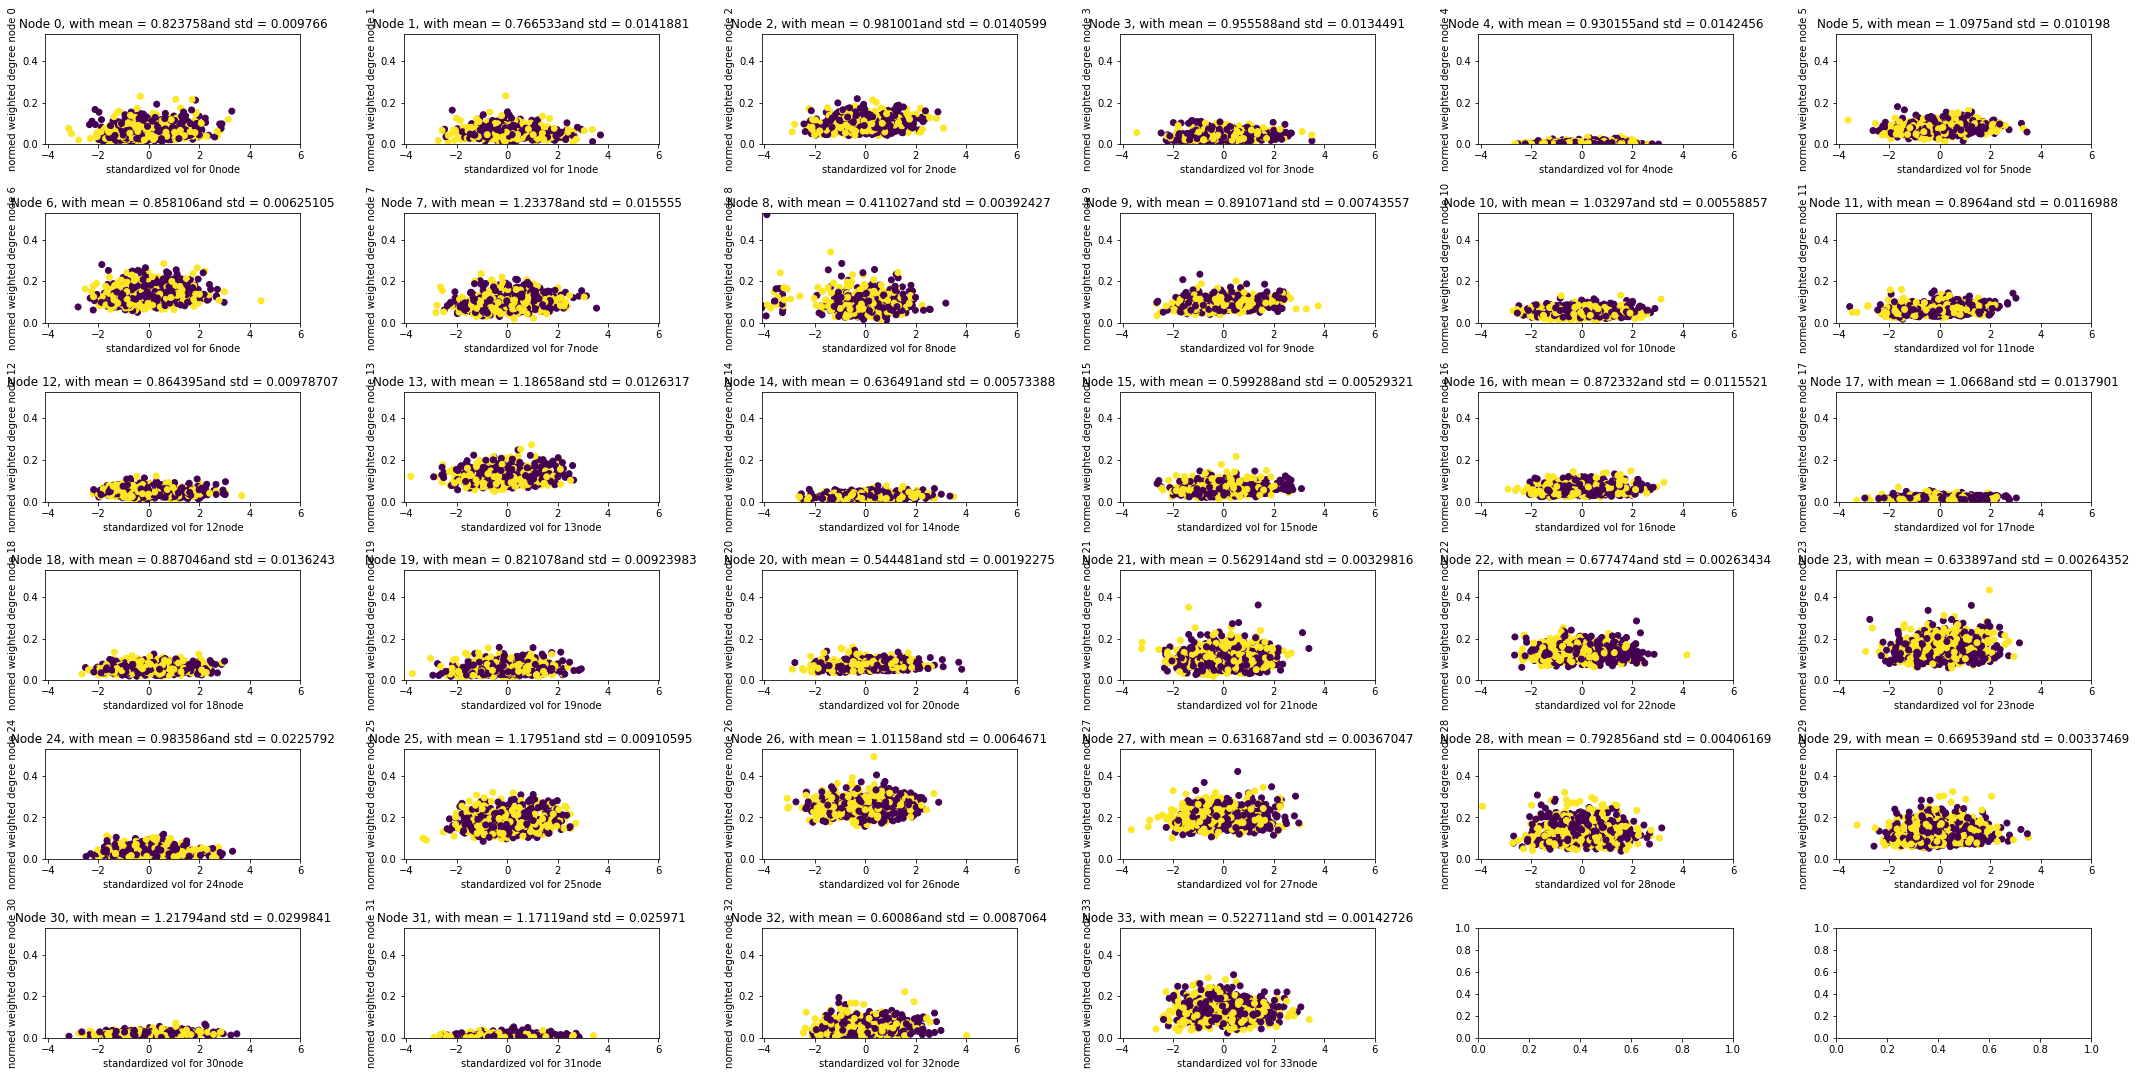

In [52]:
fig, ax = plt.subplots(6,6, figsize = (30,15))
for i in range(6):
    for j in range(6):
        if i == 5:
            if j == 4:
                break   

        ax[i, j].scatter(st_vol[np.ix_(subj_idx_un), idx[i,j]], norm_wdeg[np.ix_(subj_idx_un),idx[i,j]], c= c)
        #ax[i, 1].scatter(st_vol[:, 34 + i], norm_wdeg[:, 34+i])
        ax[i, j].set_title('Node ' + str(idx[i,j]) + ', with mean = ' + str(mean_vol[idx[i,j]]) + 'and std = ' + str(std_vol[idx[i,j]]))

        #ax[i, 1].set_title('Node ' + str(34 + i) + ', with mean = ' + str(mean_vol[34 +i]) +'and std = ' + str(std_vol[34 + i]))
        ax[i, j].set_xlabel('standardized vol for ' + str(idx[i,j]) + 'node')
        ax[i, j].set_ylabel('normed weighted degree node ' + str(idx[i,j]))
        #ax[i, 1].set_xlabel('standardized vol for ' + str(34 + i) + 'node')
        #ax[i, 1].set_ylabel('normed weighted degree node' + str(34 + i))
        ax[i, j].set_xlim([min_st_vol, max_st_vol])
        ax[i, j].set_ylim([min_norm_wdeg, max_norm_wdeg])
        #ax[i, 1].set_xlim([min_st_vol, max_st_vol])
        #ax[i, 1].set_ylim([min_norm_wdeg, max_norm_wdeg])
plt.tight_layout()
plt.savefig('vol_to_norm_wdeg', dpi = 500)

# all meshes to global

In [1]:
import numpy as np
import pandas as pd
import pickle

import os

from flexible_linear import FlexibleLinearRegression

from tv_utils import CustomTVReg, integration_mesh_to_tria, get_meshes_coord_tria, get_nodes_attribute
from data_load import load_meshes_coor_tria

from joblib import Parallel, delayed

from tv_utils import get_all_attr

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV


path_data = "/nmnt/x01-hdd/HCP/data/"

with open(path_data + "mean_mesh_labels", 'rb') as f:
    mean_labels = pickle.load(f)

with open(path_data + "subjects_log_jac", 'rb') as f:
    log_jac = pickle.load(f)

with open(path_data + "subjects_thinkness", 'rb') as f:
    thinkness = pickle.load(f)

with open(path_data + "subjects_mesh_area", 'rb') as f:
    mesh_area = pickle.load(f)

with open(path_data + 'modularity', 'rb') as f:
    modularity = pickle.load(f)

    
thinkness = thinkness.reshape(789,-1)
log_jac = log_jac.reshape(789,-1)
mesh_area = mesh_area.reshape(789,-1)


path_res = '/home/ayagoz/connec/results/'
                   

coord, tria = load_meshes_coor_tria(path_data)

X = integration_mesh_to_tria(tria, thinkness)
X.shape

custom_tvl2 = CustomTVReg(data = tria, mode_reg= 'l2')
flexl2 = FlexibleLinearRegression(C=1e-8, reg_cost_func=custom_tvl2.tv_normed_cost_func)

path_res = '/nmnt/media/home/ayagoz/HCP/connec/results/tv/all_meshes_to_global/'


import time

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
st = time.time()
X_train, X_test, y_train, y_test = train_test_split(X, modularity)
flexl2.fit(X_train, y_train)
print(time.time() - st)
r2_test = r2_score(y_test, flexl2.predict(X_test))
r2_train = r2_score(y_train, flexl2.predict(X_train))
data = pd.DataFrame(data =[r2_train, r2_test], columns=['train', 'test'])
data.to_csv(path_res + 'flexl2')

In [27]:
from sklearn.preprocessing import StandardScaler

In [57]:
i = 0

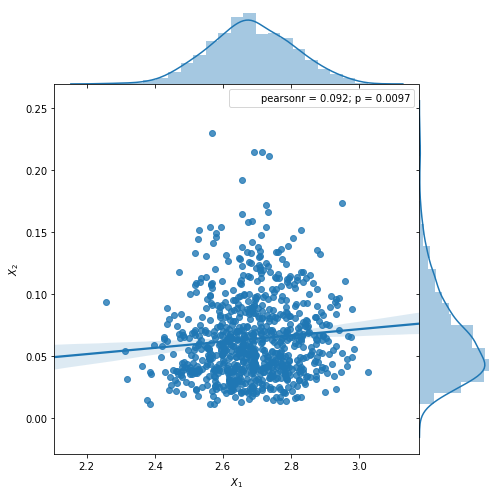

In [58]:

x1 = pd.Series(roi_think[:,i], name="$X_1$")
x2 = pd.Series(Y.sum(axis = -1)[:,i], name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="reg", size=7, space=0)

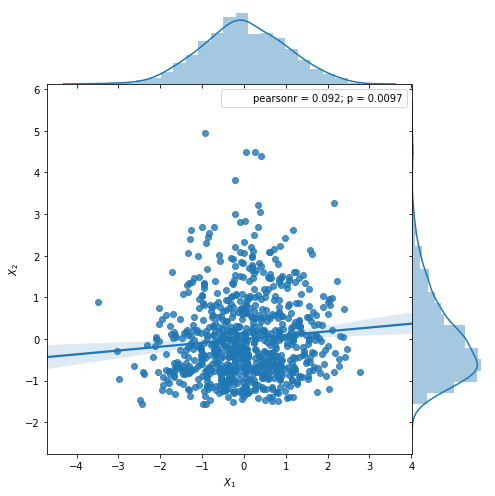

In [59]:
sc = StandardScaler()
st_roi_think = sc.fit_transform(roi_think)
st_wdeg = sc.fit_transform(Y.sum(axis = -1))
x1 = pd.Series(st_roi_think[:,i], name="$X_1$")
x2 = pd.Series(st_wdeg[:,i], name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="reg", size=7, space=0)

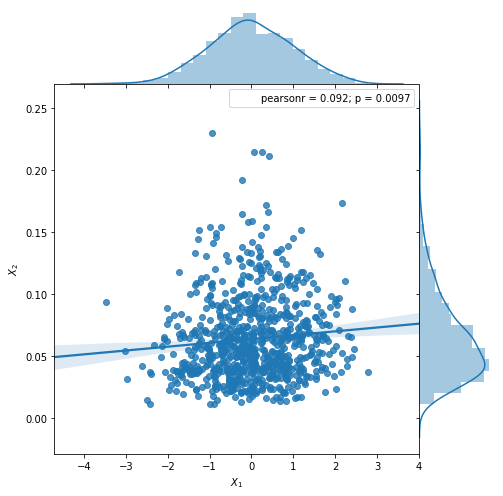

In [60]:
sc = StandardScaler()
st_roi_think = sc.fit_transform(roi_think)
st_wdeg = sc.fit_transform(Y.sum(axis = -1))
x1 = pd.Series(st_roi_think[:,i], name="$X_1$")
x2 = pd.Series(Y.sum(axis = -1)[:,i], name="$X_2$")

# Show the joint distribution using kernel density estimation
g = sns.jointplot(x1, x2, kind="reg", size=7, space=0)

In [72]:
data1 = pd.DataFrame(data = roi_think, columns=['roi_think' + str(i) for i in range(68)])
data2 = pd.DataFrame(data =  Y.sum(axis = -1), columns=['wdeg' + str(i) for i in range(68)])
data = pd.concat([data1,data2], axis = 1)


In [74]:
sns.pairplot(data, kind = 'reg', x_vars=['roi_think' + str(i) for i in range(68)], 
             y_vars=['wdeg' + str(i) for i in range(68)])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


30


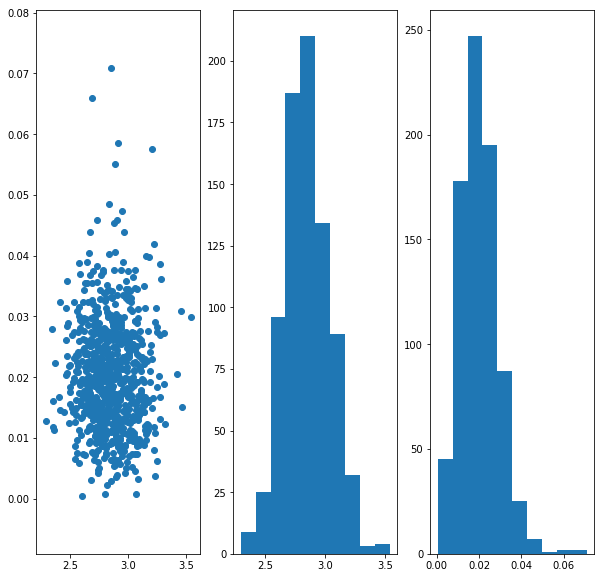

In [52]:
fig, ax = plt.subplots(1,3, figsize = (10,10))
i = np.random.randint(0, 68)
print(i)
ax[0].scatter(roi_think[:,i], Y.sum(axis = -1)[:,i])
ax[1].hist(roi_think[:,i])
ax[2].hist(Y.sum(axis = -1)[:,i]);

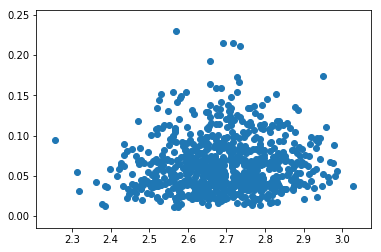

In [7]:
i = 0
plt.scatter(roi_think[:,i], Y.sum(axis = -1)[:,i]);

48


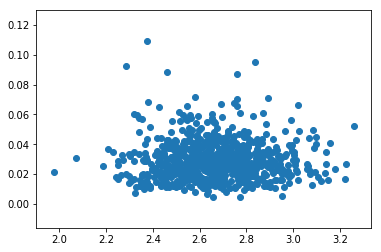

In [8]:
i = np.random.randint(0, 68)
print(i)
plt.scatter(roi_think[:,i], Y.sum(axis = -1)[:,i]);

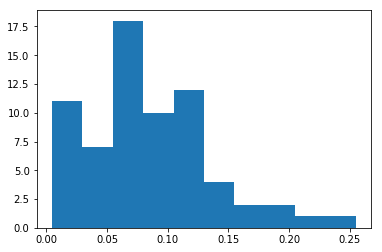

In [12]:
plt.hist(Y.sum(axis = -1).mean(axis = 0));

17


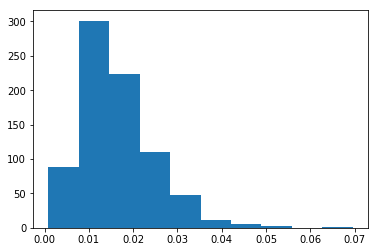

In [15]:
i = np.random.randint(0,68)
print(i)
plt.hist(Y.sum(axis = -1)[:,i]);

In [ ]:
fig, ax = plt.subplots(10,1, figsize = (200,180))
for i in range(10):
    ax[i].scatter(roi_think[:,i], Y.sum(axis = -1)[:,i])

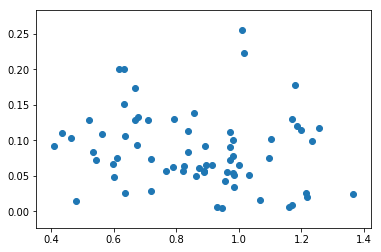

In [7]:
plt.scatter(roi_vol.mean(axis = 0), Y.sum(axis = -1).mean(axis = 0))

In [2]:
path_res = '/nmnt/media/home/ayagoz/HCP/connec/results/'
if not os.path.exists(path_res):
    os.mkdir(path_res)
path_res += 'tv/'
if not os.path.exists(path_res):
    os.mkdir(path_res)

In [3]:
path_res

'/nmnt/media/home/ayagoz/HCP/connec/results/tv/'

In [4]:
if not os.path.exists(path_res + 'node_to_node'):
    os.mkdir(path_res + 'node_to_node')
path_res += 'node_to_node/'

thinkness = thinkness.reshape(789,-1)
log_jac = log_jac.reshape(789,-1)
mesh_area = mesh_area.reshape(789,-1)

idx_nodes = list(range(1,4)) + list(range(5,39)) + list(range(40,71))
idx_nodes = np.array(idx_nodes)
print(idx_nodes.shape)
X = []
triangles = []
for i in range(68):
    node1 = idx_nodes[i]
    print(i)
    node1_tria = get_meshes_coord_tria(tria, mean_labels, node1)
    print(np.array(node1_tria).shape)
    triangles += [node1_tria] 
    T = integration_mesh_to_tria(node1_tria, thinkness)
    L = integration_mesh_to_tria(node1_tria, log_jac)
    M = integration_mesh_to_tria(node1_tria, mesh_area)
    X += [[T,L,M]]
    
print('I am here')

(68,)
0
(4015, 3)
1
(2598, 3)
2
(7167, 3)
3
(3086, 3)
4
(1421, 3)
5
(9167, 3)
6
(15365, 3)
7
(8516, 3)
8
(5598, 3)
9
(12392, 3)
10
(8057, 3)
11
(8116, 3)
12
(6253, 3)
13
(8617, 3)
14
(3029, 3)
15
(6368, 3)
16
(5901, 3)
17
(1763, 3)
18
(3885, 3)
19
(3591, 3)
20
(18418, 3)
21
(6358, 3)
22
(20975, 3)
23
(14240, 3)
24
(2575, 3)
25
(14289, 3)
26
(23890, 3)
27
(20503, 3)
28
(14128, 3)
29
(16869, 3)
30
(468, 3)
31
(1499, 3)
32
(1939, 3)
33
(11399, 3)
34
(4125, 3)
35
(3146, 3)
36
(6794, 3)
37
(3129, 3)
38
(1196, 3)
39
(8967, 3)
40
(18953, 3)
41
(8080, 3)
42
(5270, 3)
43
(11632, 3)
44
(8609, 3)
45
(7565, 3)
46
(5335, 3)
47
(9778, 3)
48
(2699, 3)
49
(7365, 3)
50
(4731, 3)
51
(1755, 3)
52
(4531, 3)
53
(3438, 3)
54
(17671, 3)
55
(5803, 3)
56
(20889, 3)
57
(15575, 3)
58
(1979, 3)
59
(15401, 3)
60
(23388, 3)
61
(19997, 3)
62
(13309, 3)
63
(15948, 3)
64
(674, 3)
65
(1371, 3)
66
(1414, 3)
67
(12168, 3)
I am here


In [29]:
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']
d = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)


In [54]:


name = ['think/', 'log_jac/', 'mesh_area/']
params = {'C':[1e-8],
         'cost_func': ['l2',]}


def main_worker(i, data, target, j, trian):
    node1 = idx_nodes[i]
    print(node1)
    custom_tvl1 = CustomTVReg(data = trian, mode_reg= 'l1')
    custom_tvl2 = CustomTVReg(data = trian, mode_reg= 'l2')

    flexl1 = FlexibleLinearRegression(C=1e-8, reg_cost_func=custom_tvl1.tv_normed_cost_func)
    flexl2 = FlexibleLinearRegression(C=1e-8, reg_cost_func=custom_tvl2.tv_normed_cost_func)
    grl1 = GridSearchCV(flexl1, param_grid=params, n_jobs=-1, scoring='r2', cv = 3)
    grl2 = GridSearchCV(flexl2, param_grid=params, n_jobs=-1, scoring='r2', cv = 3)

    for folder in name:
        if not os.path.exists(path_res + folder):
            os.mkdir(path_res + folder)

    print(data[0].shape, target[:,i].shape)



    for k in range(3):

        grl1.fit(data[k], target[:,i])
        grl2.fit(data[k], target[:,i])
        res_l1 = pd.DataFrame.from_dict(grl1.cv_results_)
        res_l1 = res_l1.sort_values(by = 'rank_test_score').iloc[:1]
        res_l1.to_csv(path_res + name[j] + 'tv_l1')

        res_l2 = pd.DataFrame.from_dict(grl2.cv_results_)
        res_l2 = res_l2.sort_values(by = 'rank_test_score').iloc[:1]
        res_l2.to_csv(path_res + name[j] + 'tv_l2')
    

In [ ]:
for j, target in enumerate(targets_data):
    print(targets_name[j])
    print(target.shape)
    Parallel(n_jobs=28)(delayed(main_worker)(i, target, j, triangles[i]) for i in range(68))
    print('Finished work for ' + targets_name[j])
print('I finished all')

In [55]:
%timeit
Parallel(n_jobs=1)(delayed(main_worker)(i, X[i] targets_data[i], i, triangles[i]) for i in range(1))

1
(789, 4015) (789,)


[None]

In [138]:
name = ['think/', 'log_jac/', 'mesh_area/']
params = {'C':[5*1e-5, ], 
         'cost_func': ['l2']}

custom_tvl2 = CustomTVReg(data = triangles[64], mode_reg= 'l2')
flexl2 = FlexibleLinearRegression(C=1e-8, reg_cost_func=custom_tvl2.tv_normed_cost_func)
grl2 = GridSearchCV(flexl2, param_grid=params, n_jobs=1, scoring='r2', cv = 2)

path_res = '/nmnt/media/home/ayagoz/HCP/connec/results/tv/node_to_node/'

for folder in name:
    if not os.path.exists(path_res + folder):
        os.mkdir(path_res + folder)

print(np.array(X[64]).shape, targets_data[0].shape)

import time

st = time.time()
grl2.fit(X[64][0], targets_data[0][:,64])

res_l2 = pd.DataFrame.from_dict(grl2.cv_results_)
    
print(time.time() - st)

In [146]:
res_l2.sort_values(by ='rank_test_score')

mean_fit_time  mean_score_time  mean_test_score  mean_train_score param_C  \
0       0.872842          0.00062        -9.254394         -9.254077   5e-05   

  param_cost_func                           params  rank_test_score  \
0              l2  {'C': 5e-05, 'cost_func': 'l2'}                1   

   split0_test_score  split0_train_score  split1_test_score  \
0          -9.504224            -9.00393           -9.00393   

   split1_train_score  std_fit_time  std_score_time  std_test_score  \
0           -9.504224      0.034681        0.000021        0.250146   

   std_train_score  
0         0.250147